# **Loading Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,ConfusionMatrixDisplay, matthews_corrcoef
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import os
import warnings
warnings.filterwarnings('ignore')

***Reading the Diabetes Data***

In [ ]:
df=pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

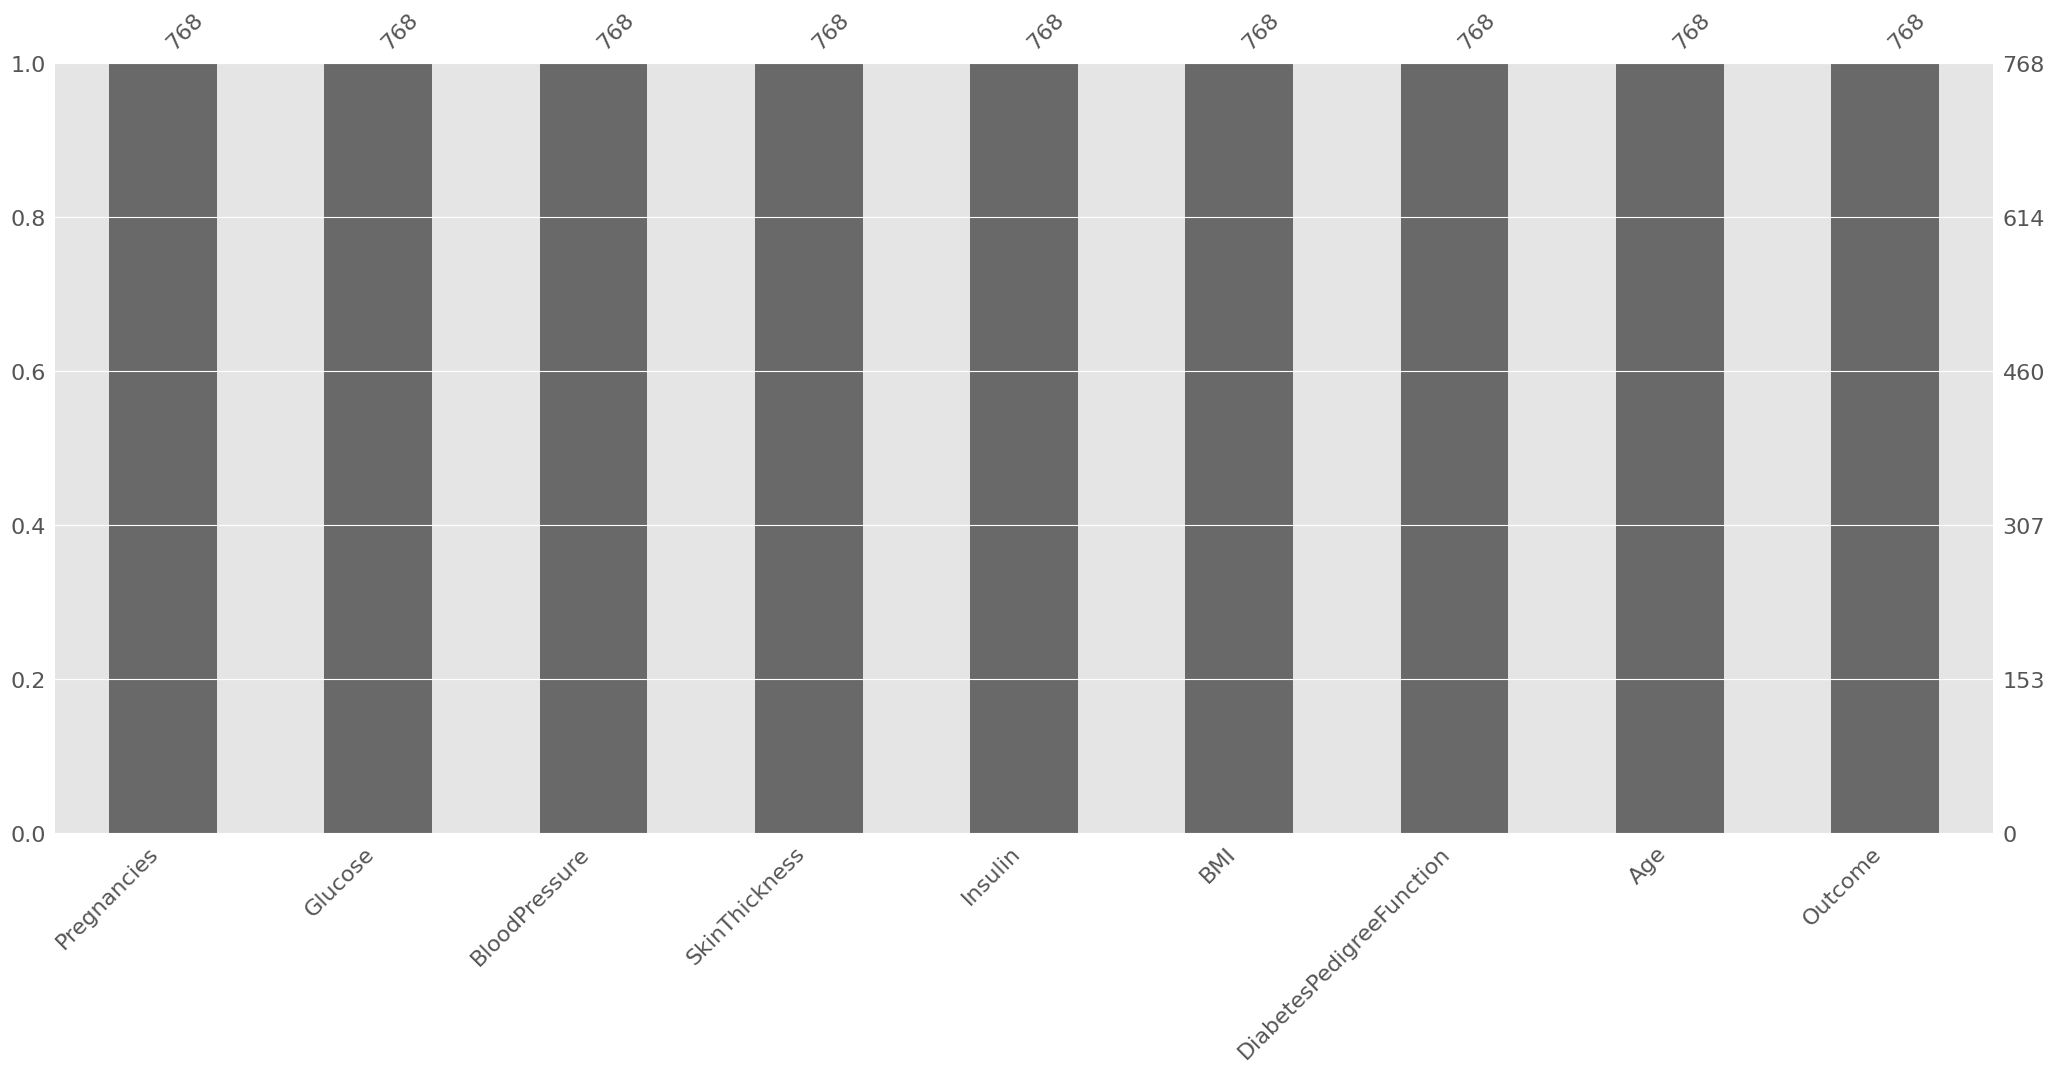

In [ ]:
import missingno as msno
p=msno.bar(df)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Pregnancies: 17 distinct values
Glucose: 136 distinct values
BloodPressure: 47 distinct values
SkinThickness: 51 distinct values
Insulin: 186 distinct values
BMI: 248 distinct values
DiabetesPedigreeFunction: 517 distinct values
Age: 52 distinct values
Outcome: 2 distinct values


In [ ]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
             87       0              23             0        28.9  0.773                     25   0          1
                      58             16             52       32.7  0.166                     25   0          1
17           163      72             41             114      40.9  0.817                     47   1          1
Name: count, Length: 768, dtype: int64

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

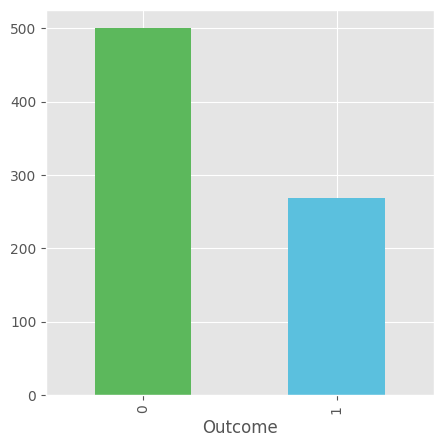

In [ ]:
# visualization to know if the target is balanced or not
df['Outcome'].value_counts()[:20].plot(kind='bar',figsize=(5, 5),color=['#5cb85c','#5bc0de'])

In [ ]:
df.isin([0]).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
# Can minimum value of below listed columns be zero (0)?¶
# On these columns, a value of zero does not make sense and thus indicates missing value.
# Following columns or variables have an invalid zero value:
# Glucose
# BloodPressure
# SkinThickness
# Insulin
# BMI
# It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


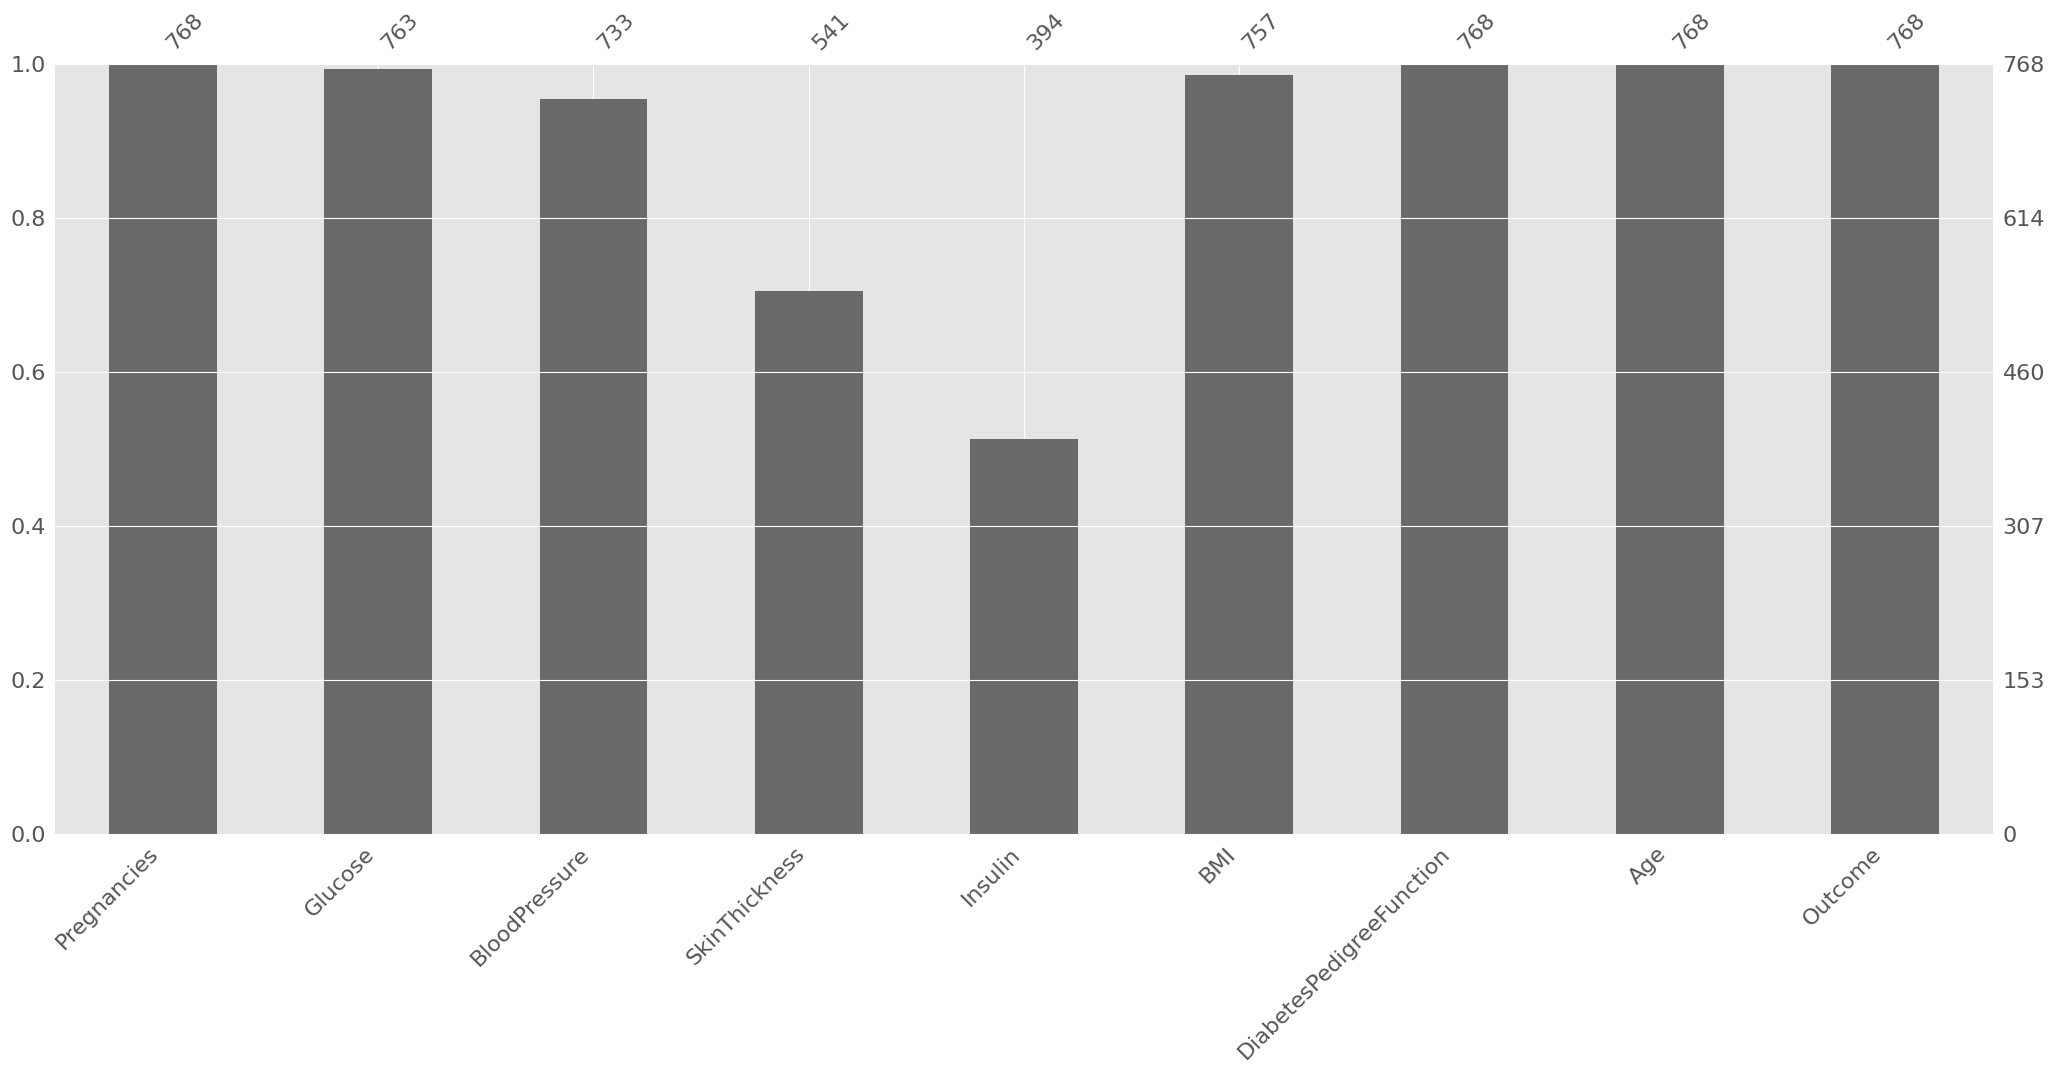

In [ ]:
import missingno as msno
p=msno.bar(df_copy)

**Visualizations for getting Insights**

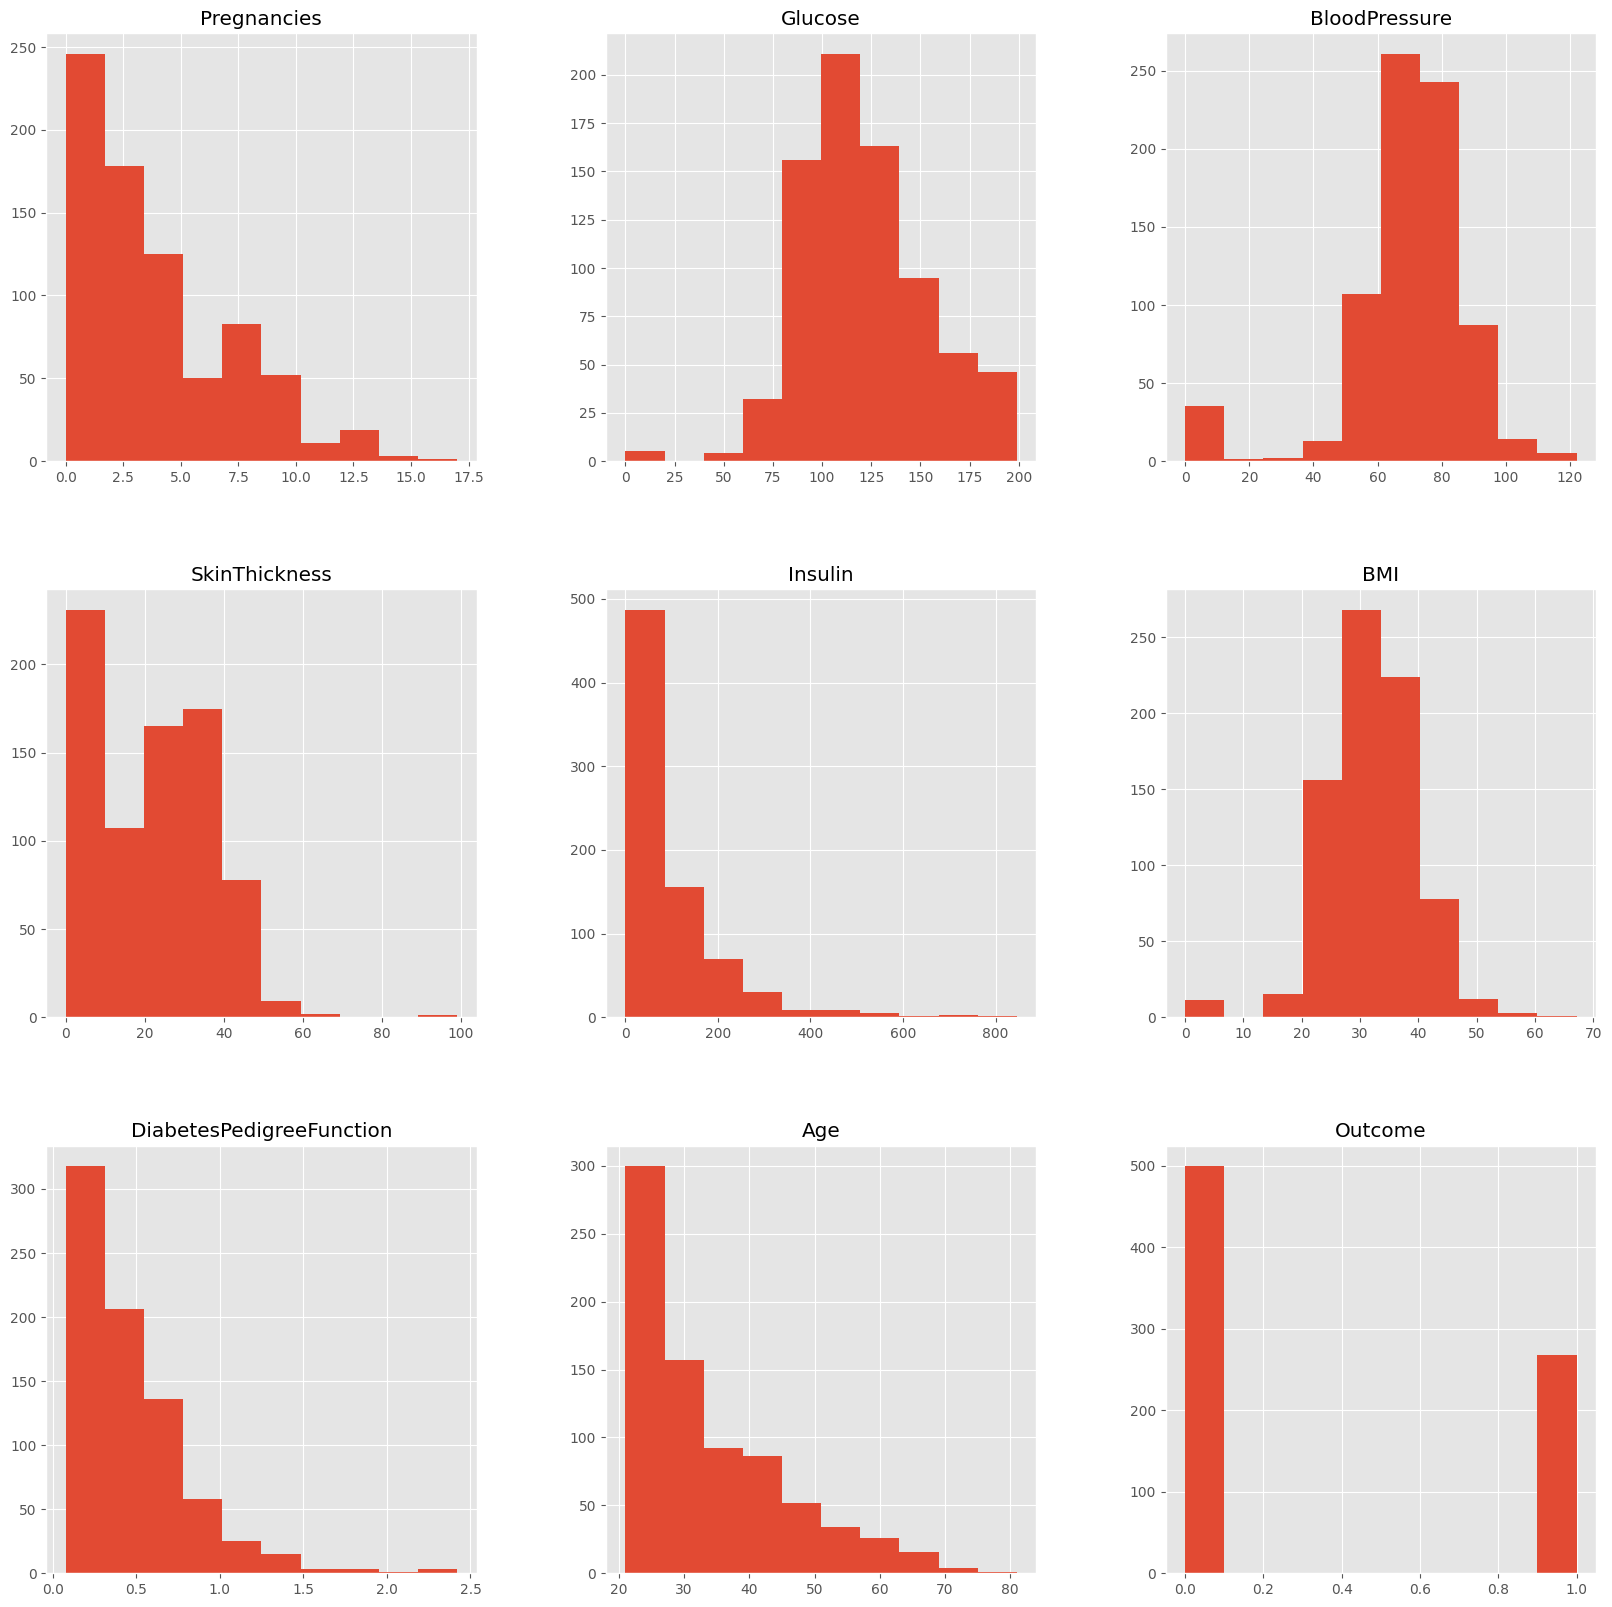

In [ ]:
# To fill these Nan values the data distribution needs to be understood
p = df.hist(figsize = (20,20))

**Filling_NAN_Values**

In [ ]:
# Aiming to impute nan values for the columns in accordance with their distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

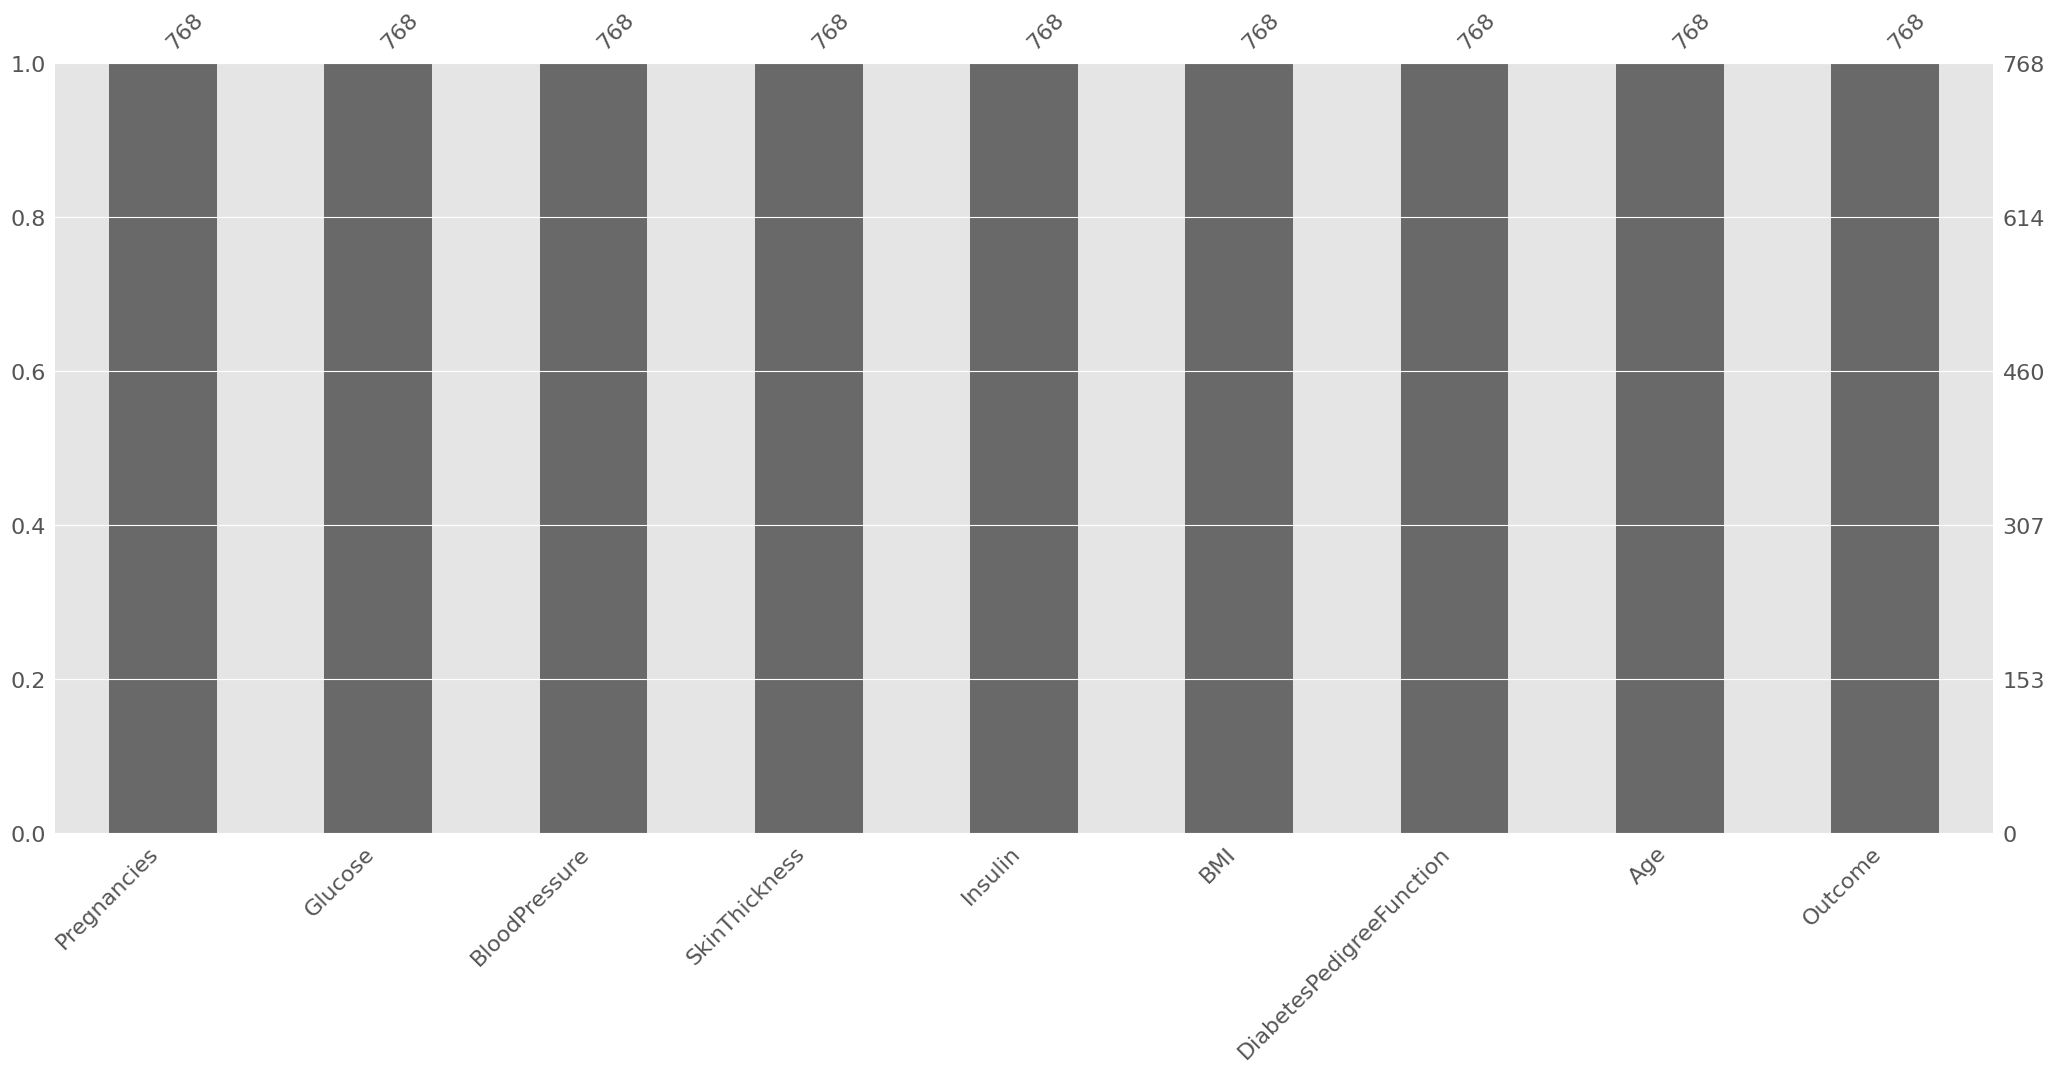

In [ ]:
import missingno as msno
p=msno.bar(df_copy)

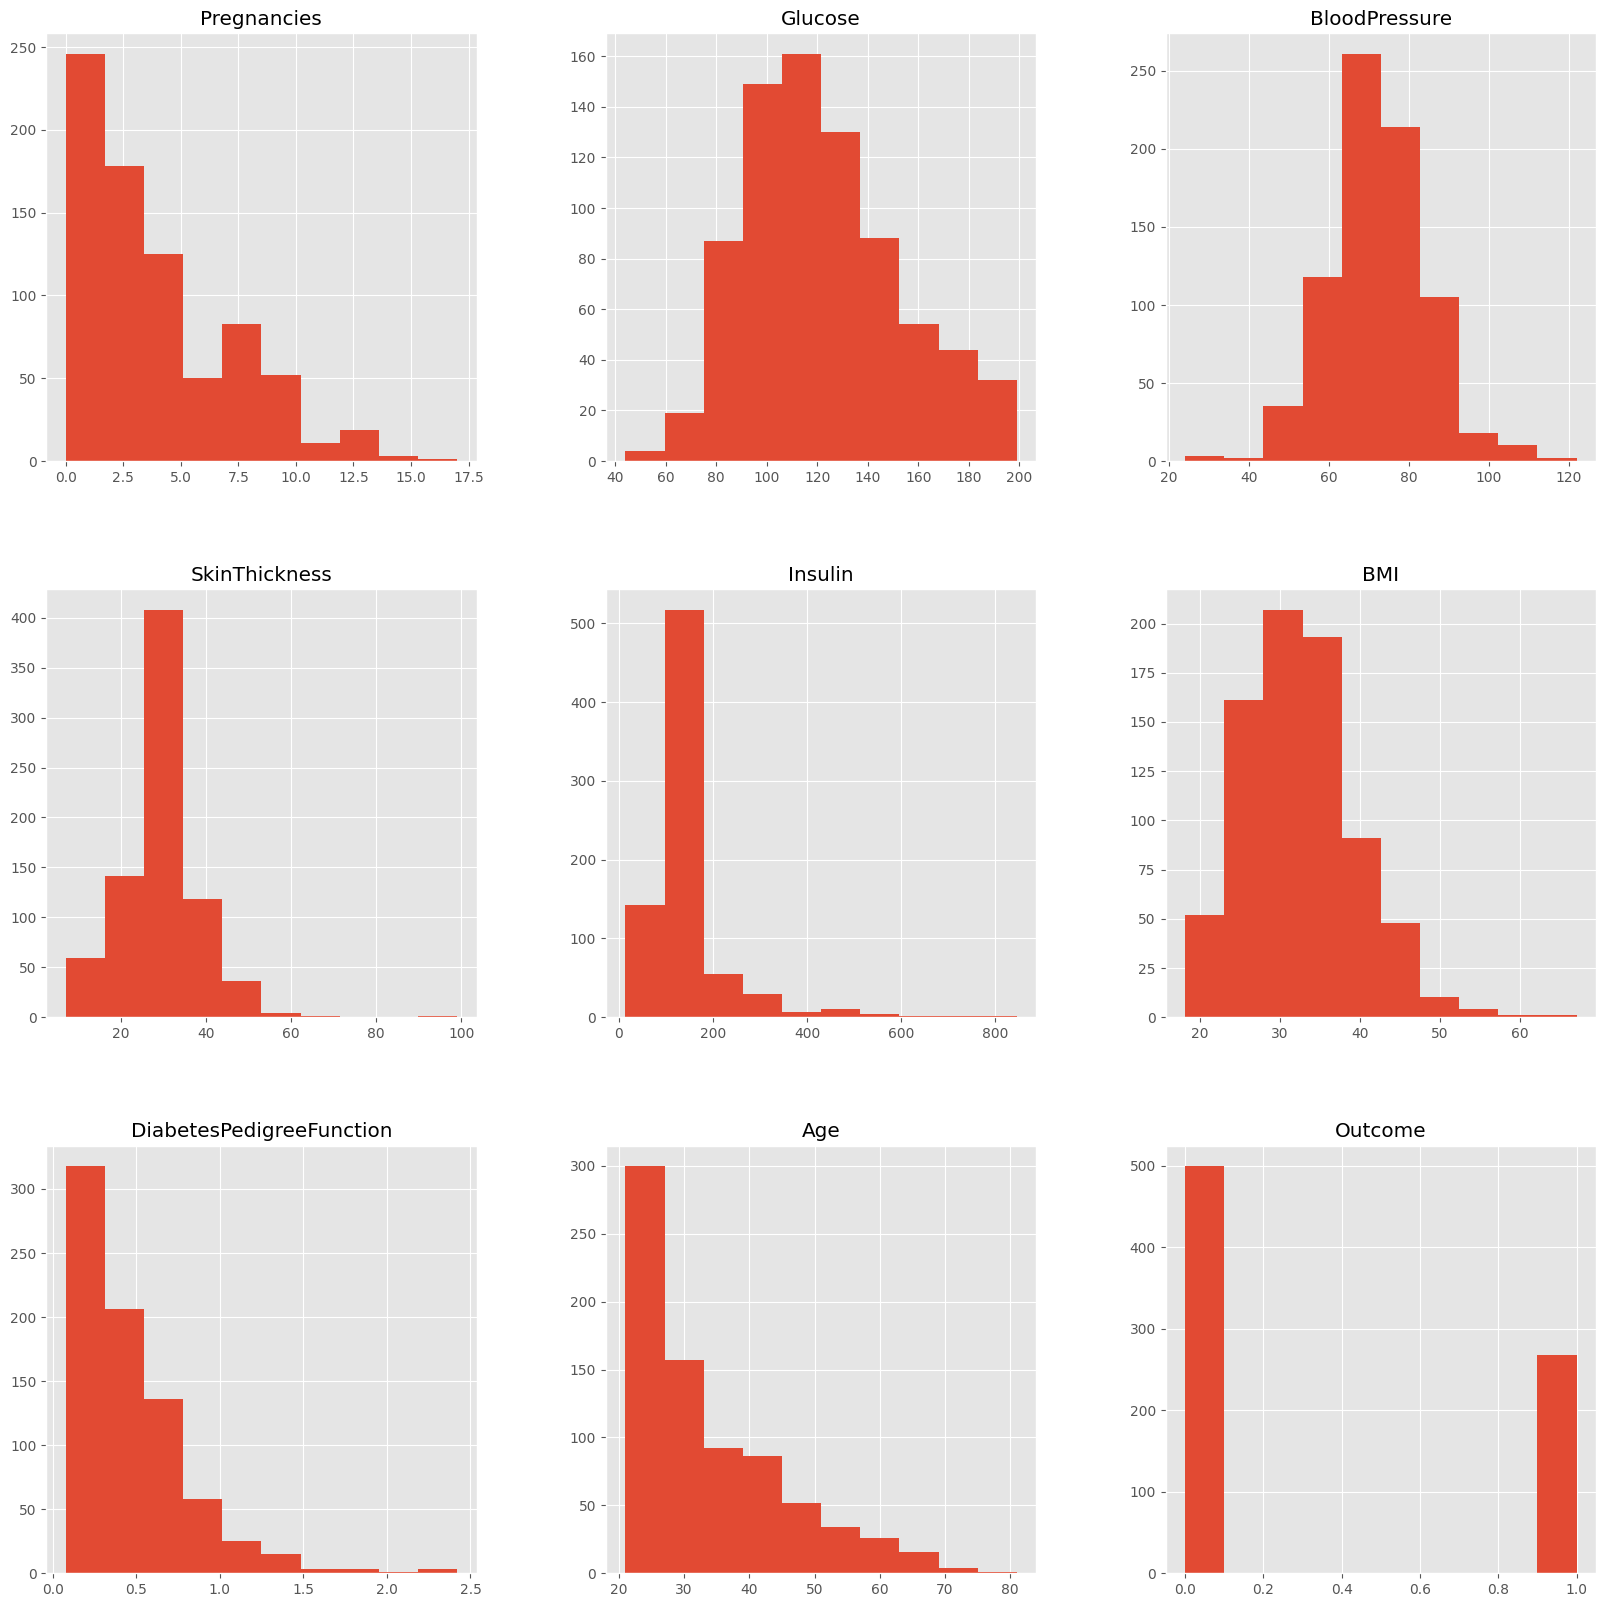

In [ ]:
# plotting after NAN removal
p = df_copy.hist(figsize = (20,20))

<Axes: title={'center': 'Age Distribution of Non-Diabetic Patient'}, xlabel='Age', ylabel='Count'>

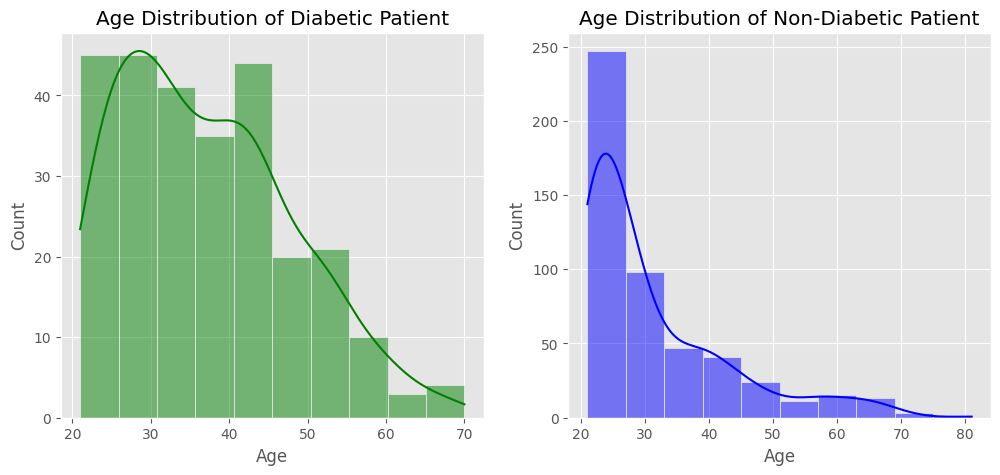

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Age Distribution of Diabetic Patient")
sns.histplot(x=df[df['Outcome']==1]['Age'],kde=True,bins=10,color='green')
plt.subplot(1,2,2)
plt.title("Age Distribution of Non-Diabetic Patient")
sns.histplot(x=df[df['Outcome']==0]['Age'],kde=True,bins=10,color='blue')

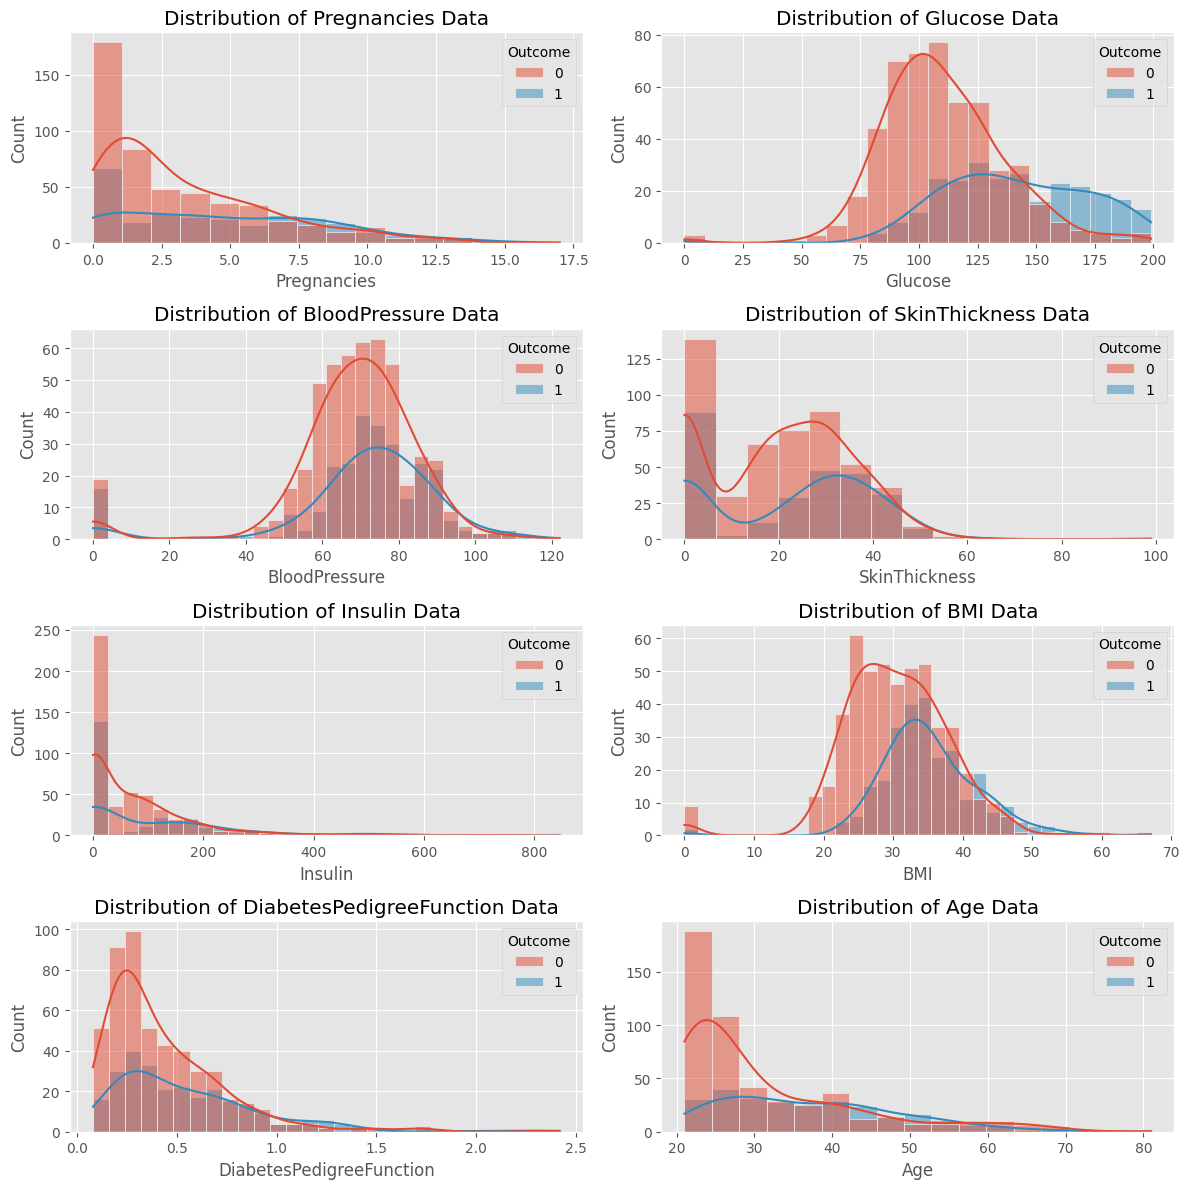

In [ ]:
plt.figure(figsize=(12,12))
num_row=1
for col in df_copy.columns[:-1]:
    plt.subplot(4,2,num_row)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(x=df[col],kde=True,hue=df['Outcome'])
    plt.tight_layout()
    num_row=num_row+1
plt.show()

**Outliers**

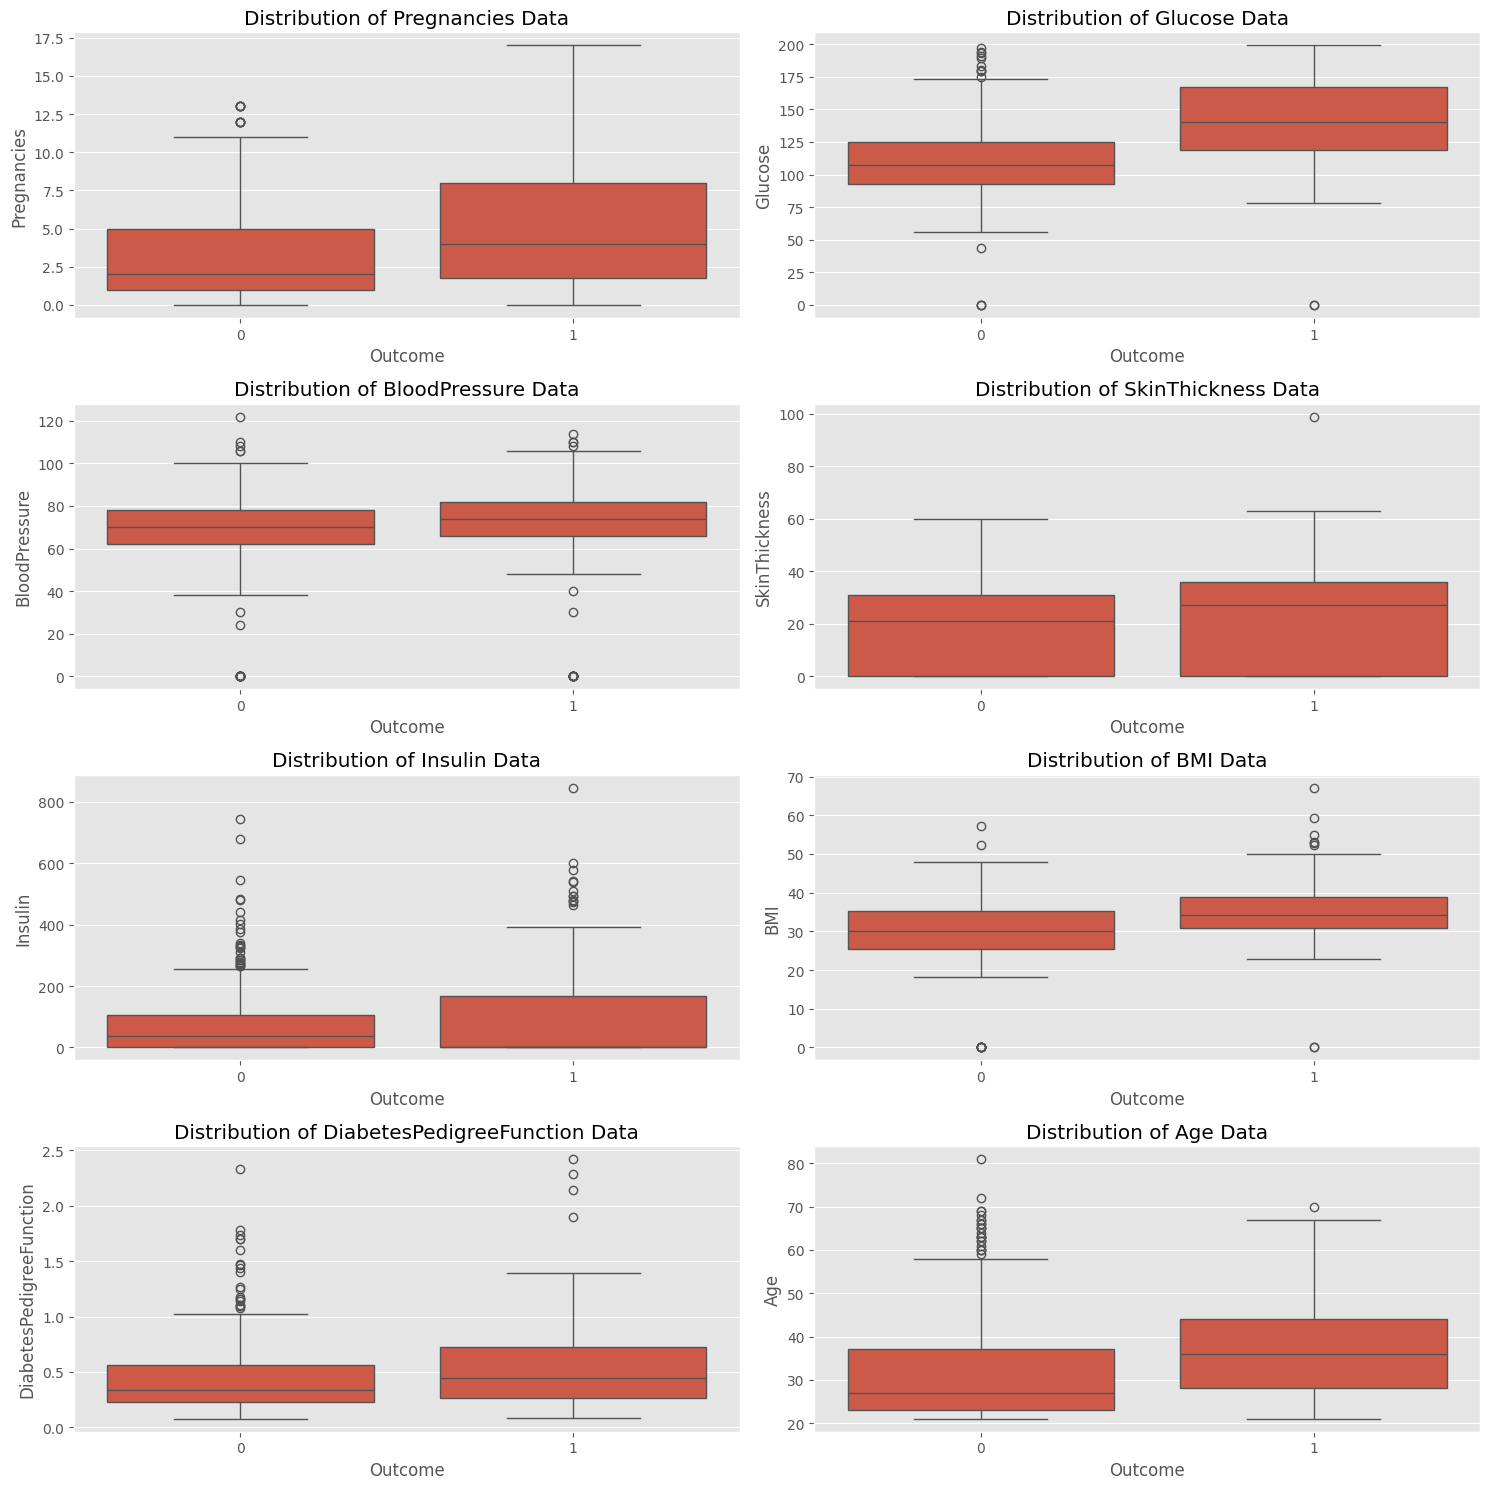

In [ ]:
plt.figure(figsize=(15,15))
num_row=1
for col in df_copy.columns[:-1]:
    plt.subplot(4,2,num_row)
    plt.title(f"Distribution of {col} Data")
    sns.boxplot(y=df[col],x=df['Outcome'])
    plt.tight_layout()
    num_row=num_row+1
plt.show()

**multivariate_Analysis**

Categorical Features : Outcome
Numerical Features : Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age


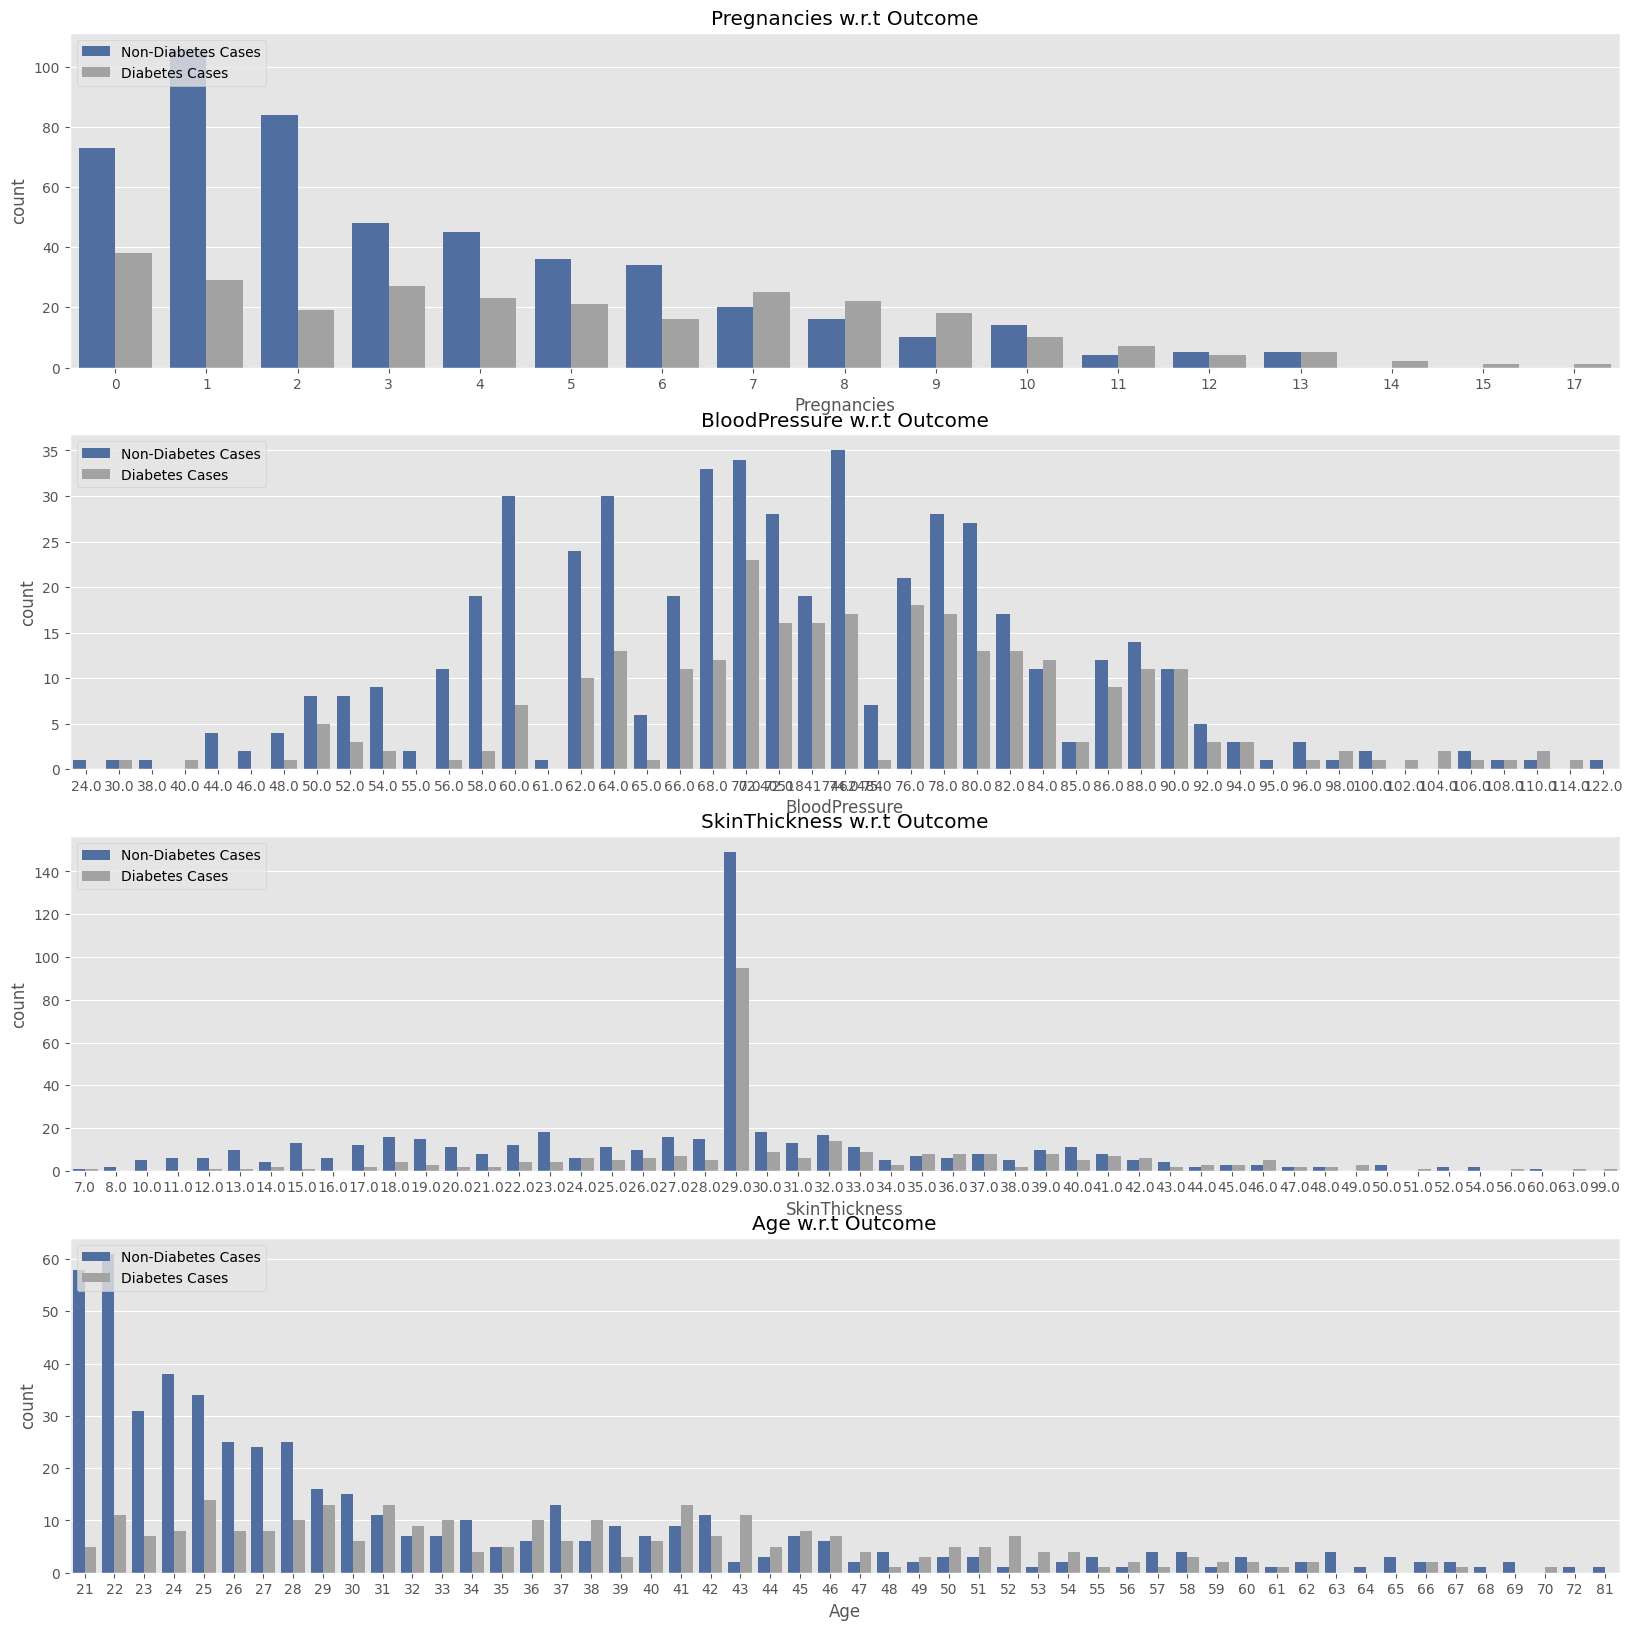

In [ ]:
col = list(df_copy.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df_copy[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)
colors = ['#446BAD','#A2A2A2']
l1 = ['Pregnancies','BloodPressure','SkinThickness','Age']
l2 = [i for i in numerical_features if i not in l1]
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (20,20))
for i in range(len(l1)):
    plt.subplot(4,1,i+1)
    sns.countplot(x=l1[i],hue='Outcome',data=df_copy,palette=colors)
    plt.legend(['Non-Diabetes Cases','Diabetes Cases'],loc = 'upper left')
    title = l1[i] + ' w.r.t Outcome'
    plt.title(title);

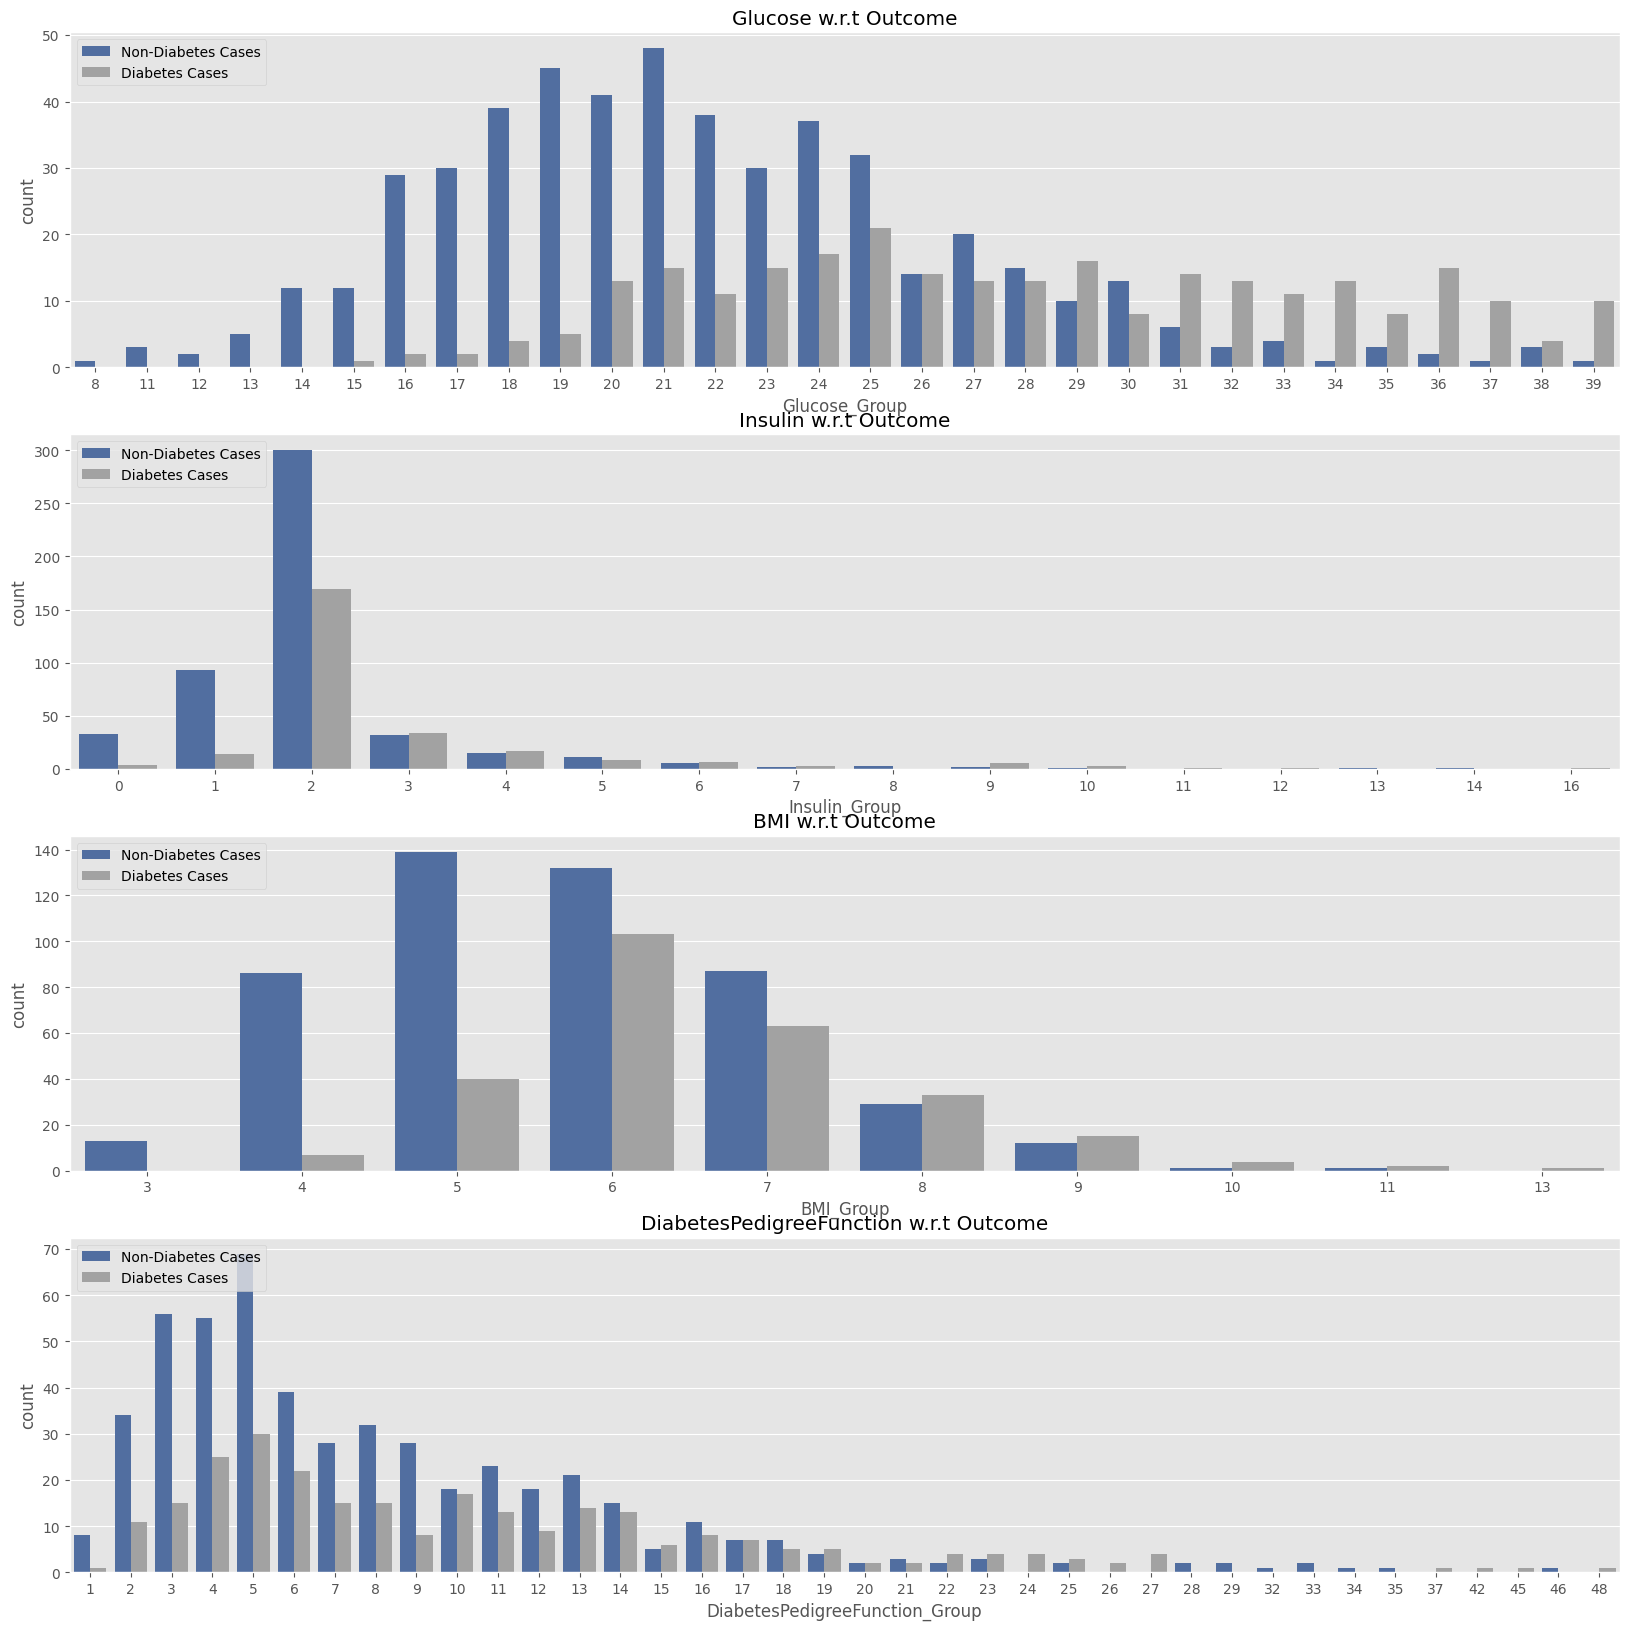

In [ ]:
df_copy['Glucose_Group'] = [ int(i / 5) for i in df_copy['Glucose']]
df_copy['Insulin_Group'] = [ int(i / 50) for i in df_copy['Insulin']]
df_copy['BMI_Group'] = [ int(i / 5) for i in df_copy['BMI']]
df_copy['DiabetesPedigreeFunction_Group'] = [ int((i*100) / 5) for i in df_copy['DiabetesPedigreeFunction']]
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (20,20))

group_numerical_features = [i + '_Group' for i in l2]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(x=group_numerical_features[i],hue='Outcome',data=df_copy,palette=colors)
    plt.legend(['Non-Diabetes Cases','Diabetes Cases'],loc = 'upper left')
    title = l2[i] + ' w.r.t Outcome'
    plt.title(title);

In [ ]:
features_to_drop = ['Glucose_Group','Insulin_Group','BMI_Group','DiabetesPedigreeFunction_Group']
df_copy.drop(columns = features_to_drop,inplace=True)

**Getting_Insights_From_Relationship_between_Features**

In [ ]:
'''
insights from the previous graph:
strong positive relationship between the number of pregnancies and the BMI
so BMI will generally be higher for women who have had more numbers of pregnancy as well as for those who test positive for diabetes.
then Those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.
Since those who tested positive have a higher median and more high outliers.
Both test results show many outliers yet the outliers for those who tested negative seem to be lower pedigree functions than those who tested positive.
This concluded that the genetic component is likely to contribute more to the emergence of diabetes than the number of pregnancies.
women could have higher BMIs and not be outliers if they tested positive as opposed to negative, showing that more women who tested positive did, in fact, have higher BMIs than those who tested negative.
Age group 21 - 50 displays a higher probability of being diagnosed with diabetes.
SkinThickness displays very low number of diabetes cases for all the values. Out of those values, 24 - 42 has some prominent peaks of diabetes cases.
BloodPressure range of values 60 - 90 mm/hg highlights a high number of diabetes patients.

'''

'\ninsights from the previous graph:\nstrong positive relationship between the number of pregnancies and the BMI\nso BMI will generally be higher for women who have had more numbers of pregnancy as well as for those who test positive for diabetes.\nthen Those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.\nSince those who tested positive have a higher median and more high outliers.\nBoth test results show many outliers yet the outliers for those who tested negative seem to be lower pedigree functions than those who tested positive.\nThis concluded that the genetic component is likely to contribute more to the emergence of diabetes than the number of pregnancies.\nwomen could have higher BMIs and not be outliers if they tested positive as opposed to negative, showing that more women who tested positive did, in fact, have higher BMIs than those who tested negative.\nAge group 21 - 50 displays a higher probability of being d

In [ ]:
for column in df_copy.columns[:-1]:
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_range = (df_copy[column] < (Q1 - 1.5*IQR)) | (df_copy[column] > (Q3 + 1.5 * IQR))
    num_outliers = df_copy[column][outlier_range].count()

    print(f"{column}: {num_outliers} outliers")

Pregnancies: 4 outliers
Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 87 outliers
Insulin: 346 outliers
BMI: 8 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers


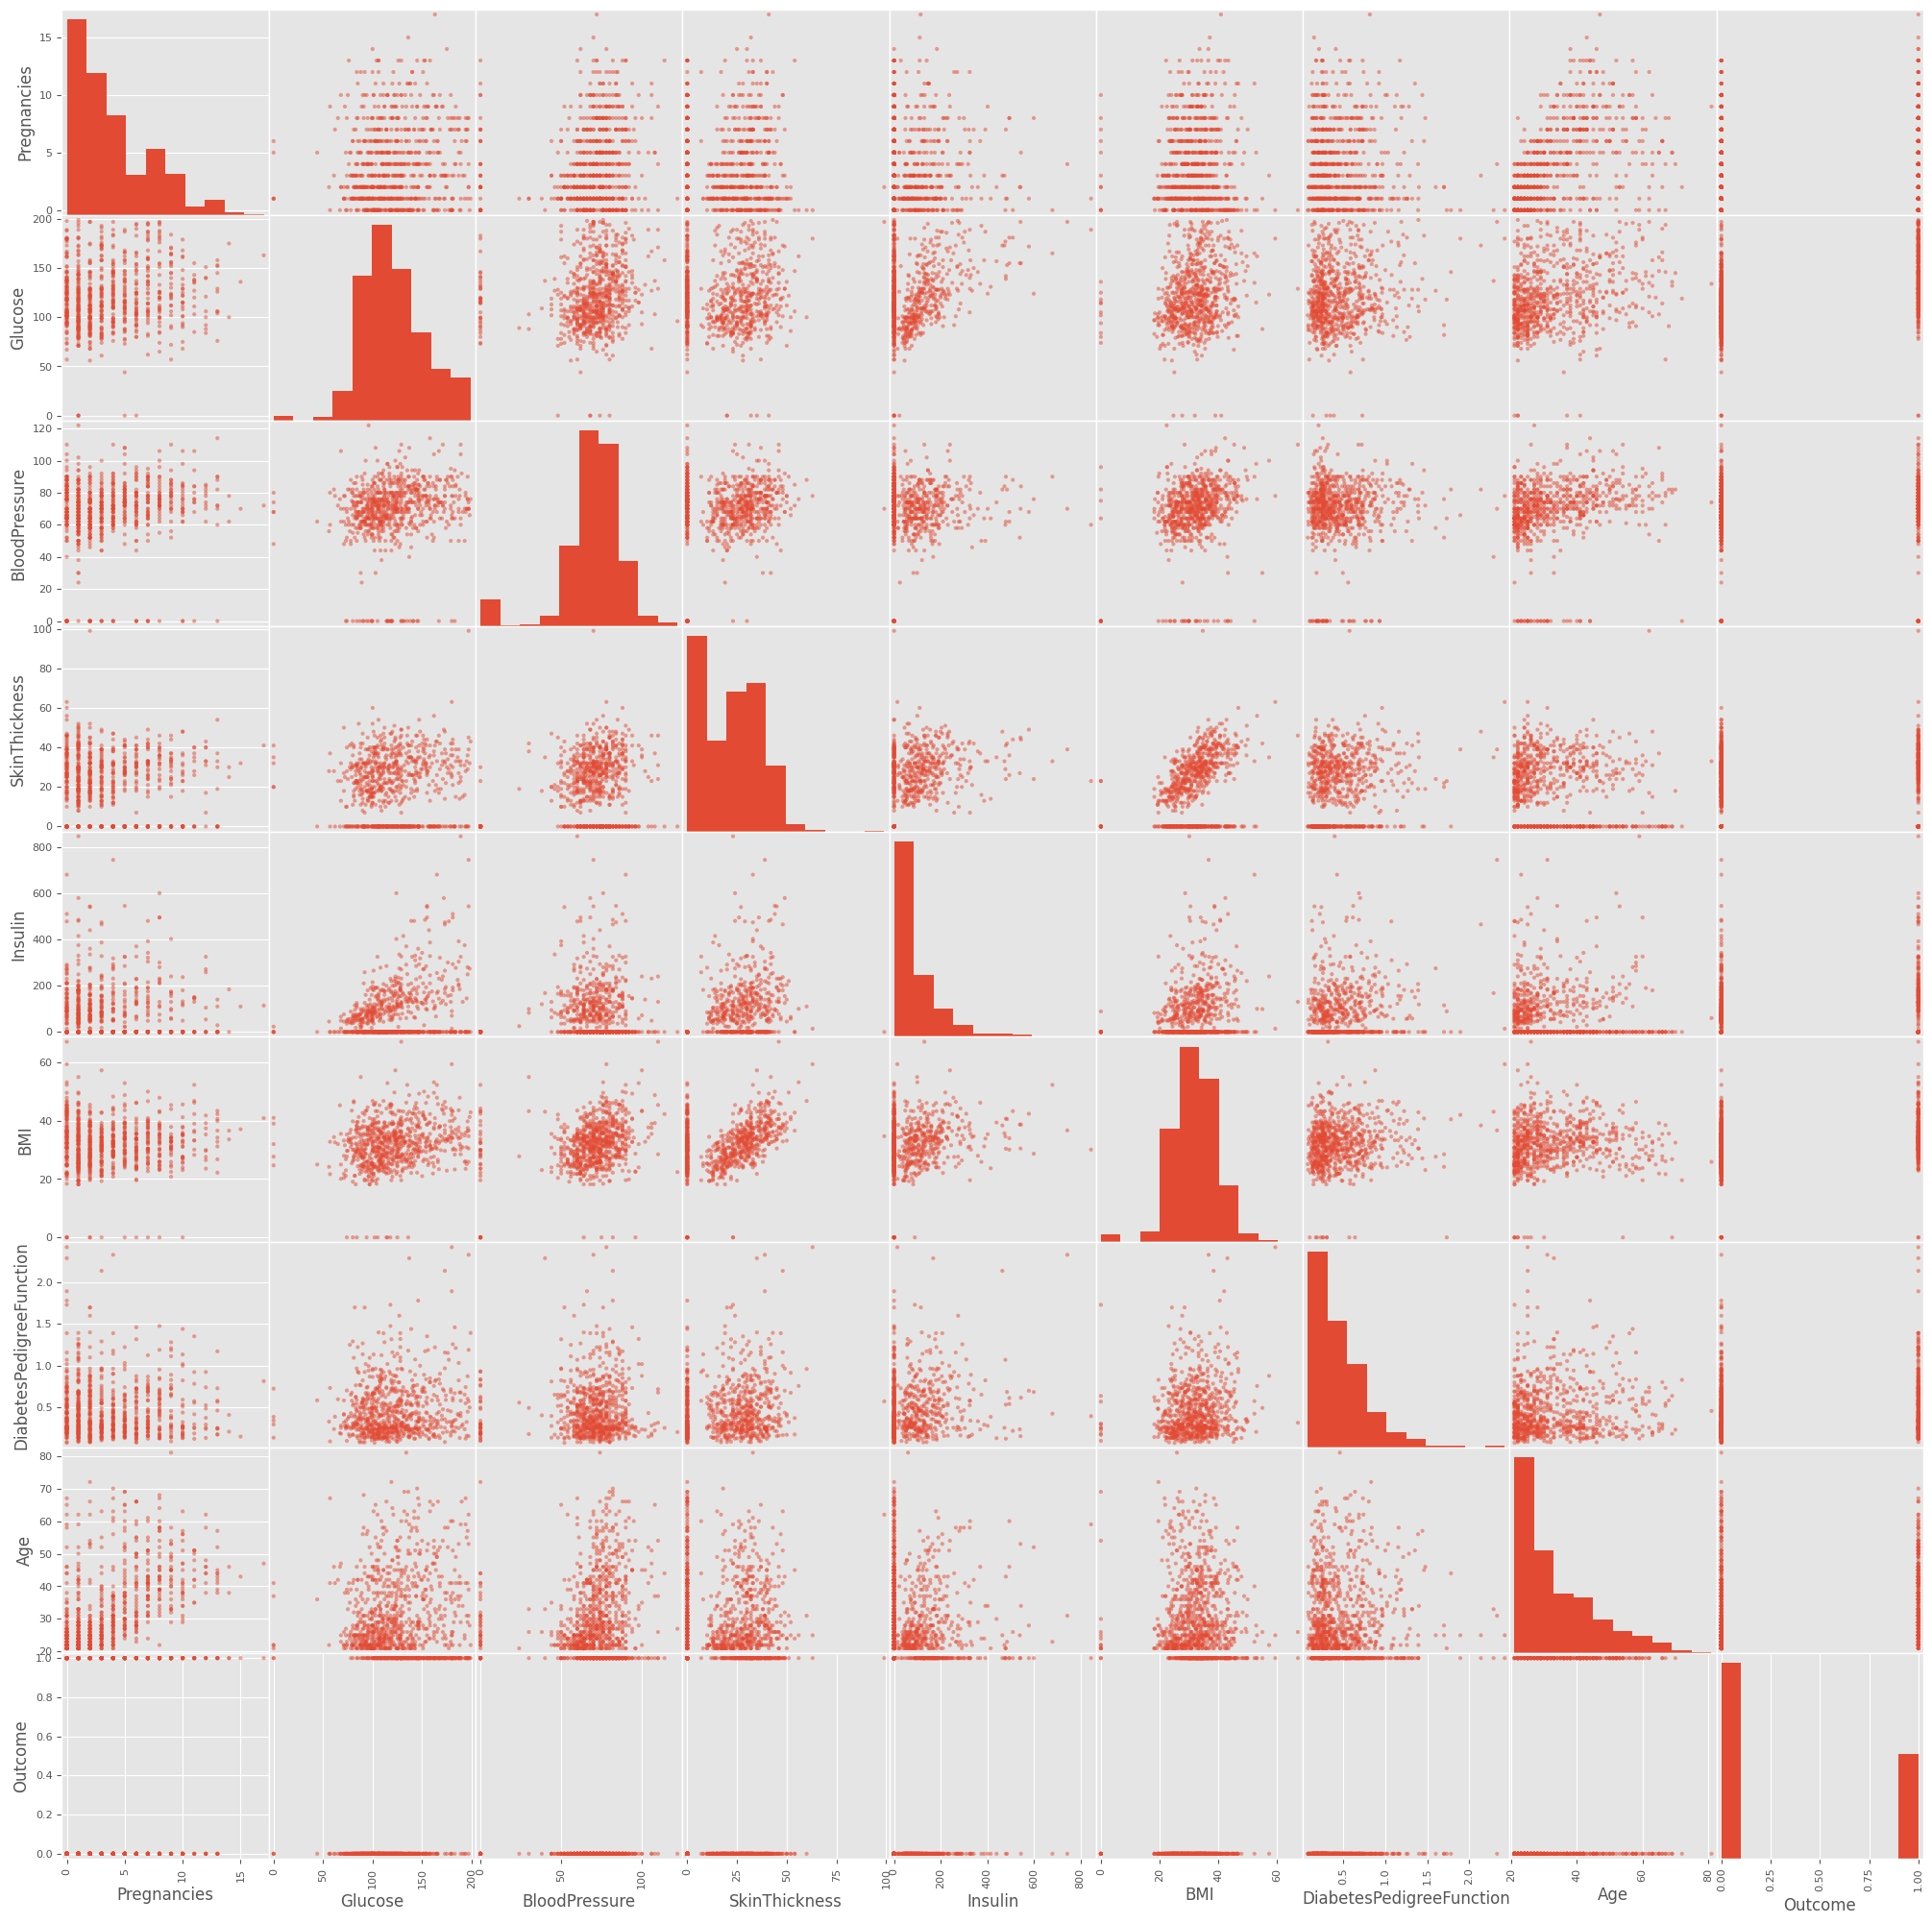

In [ ]:
# Before Cleaning the data relation between the features
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

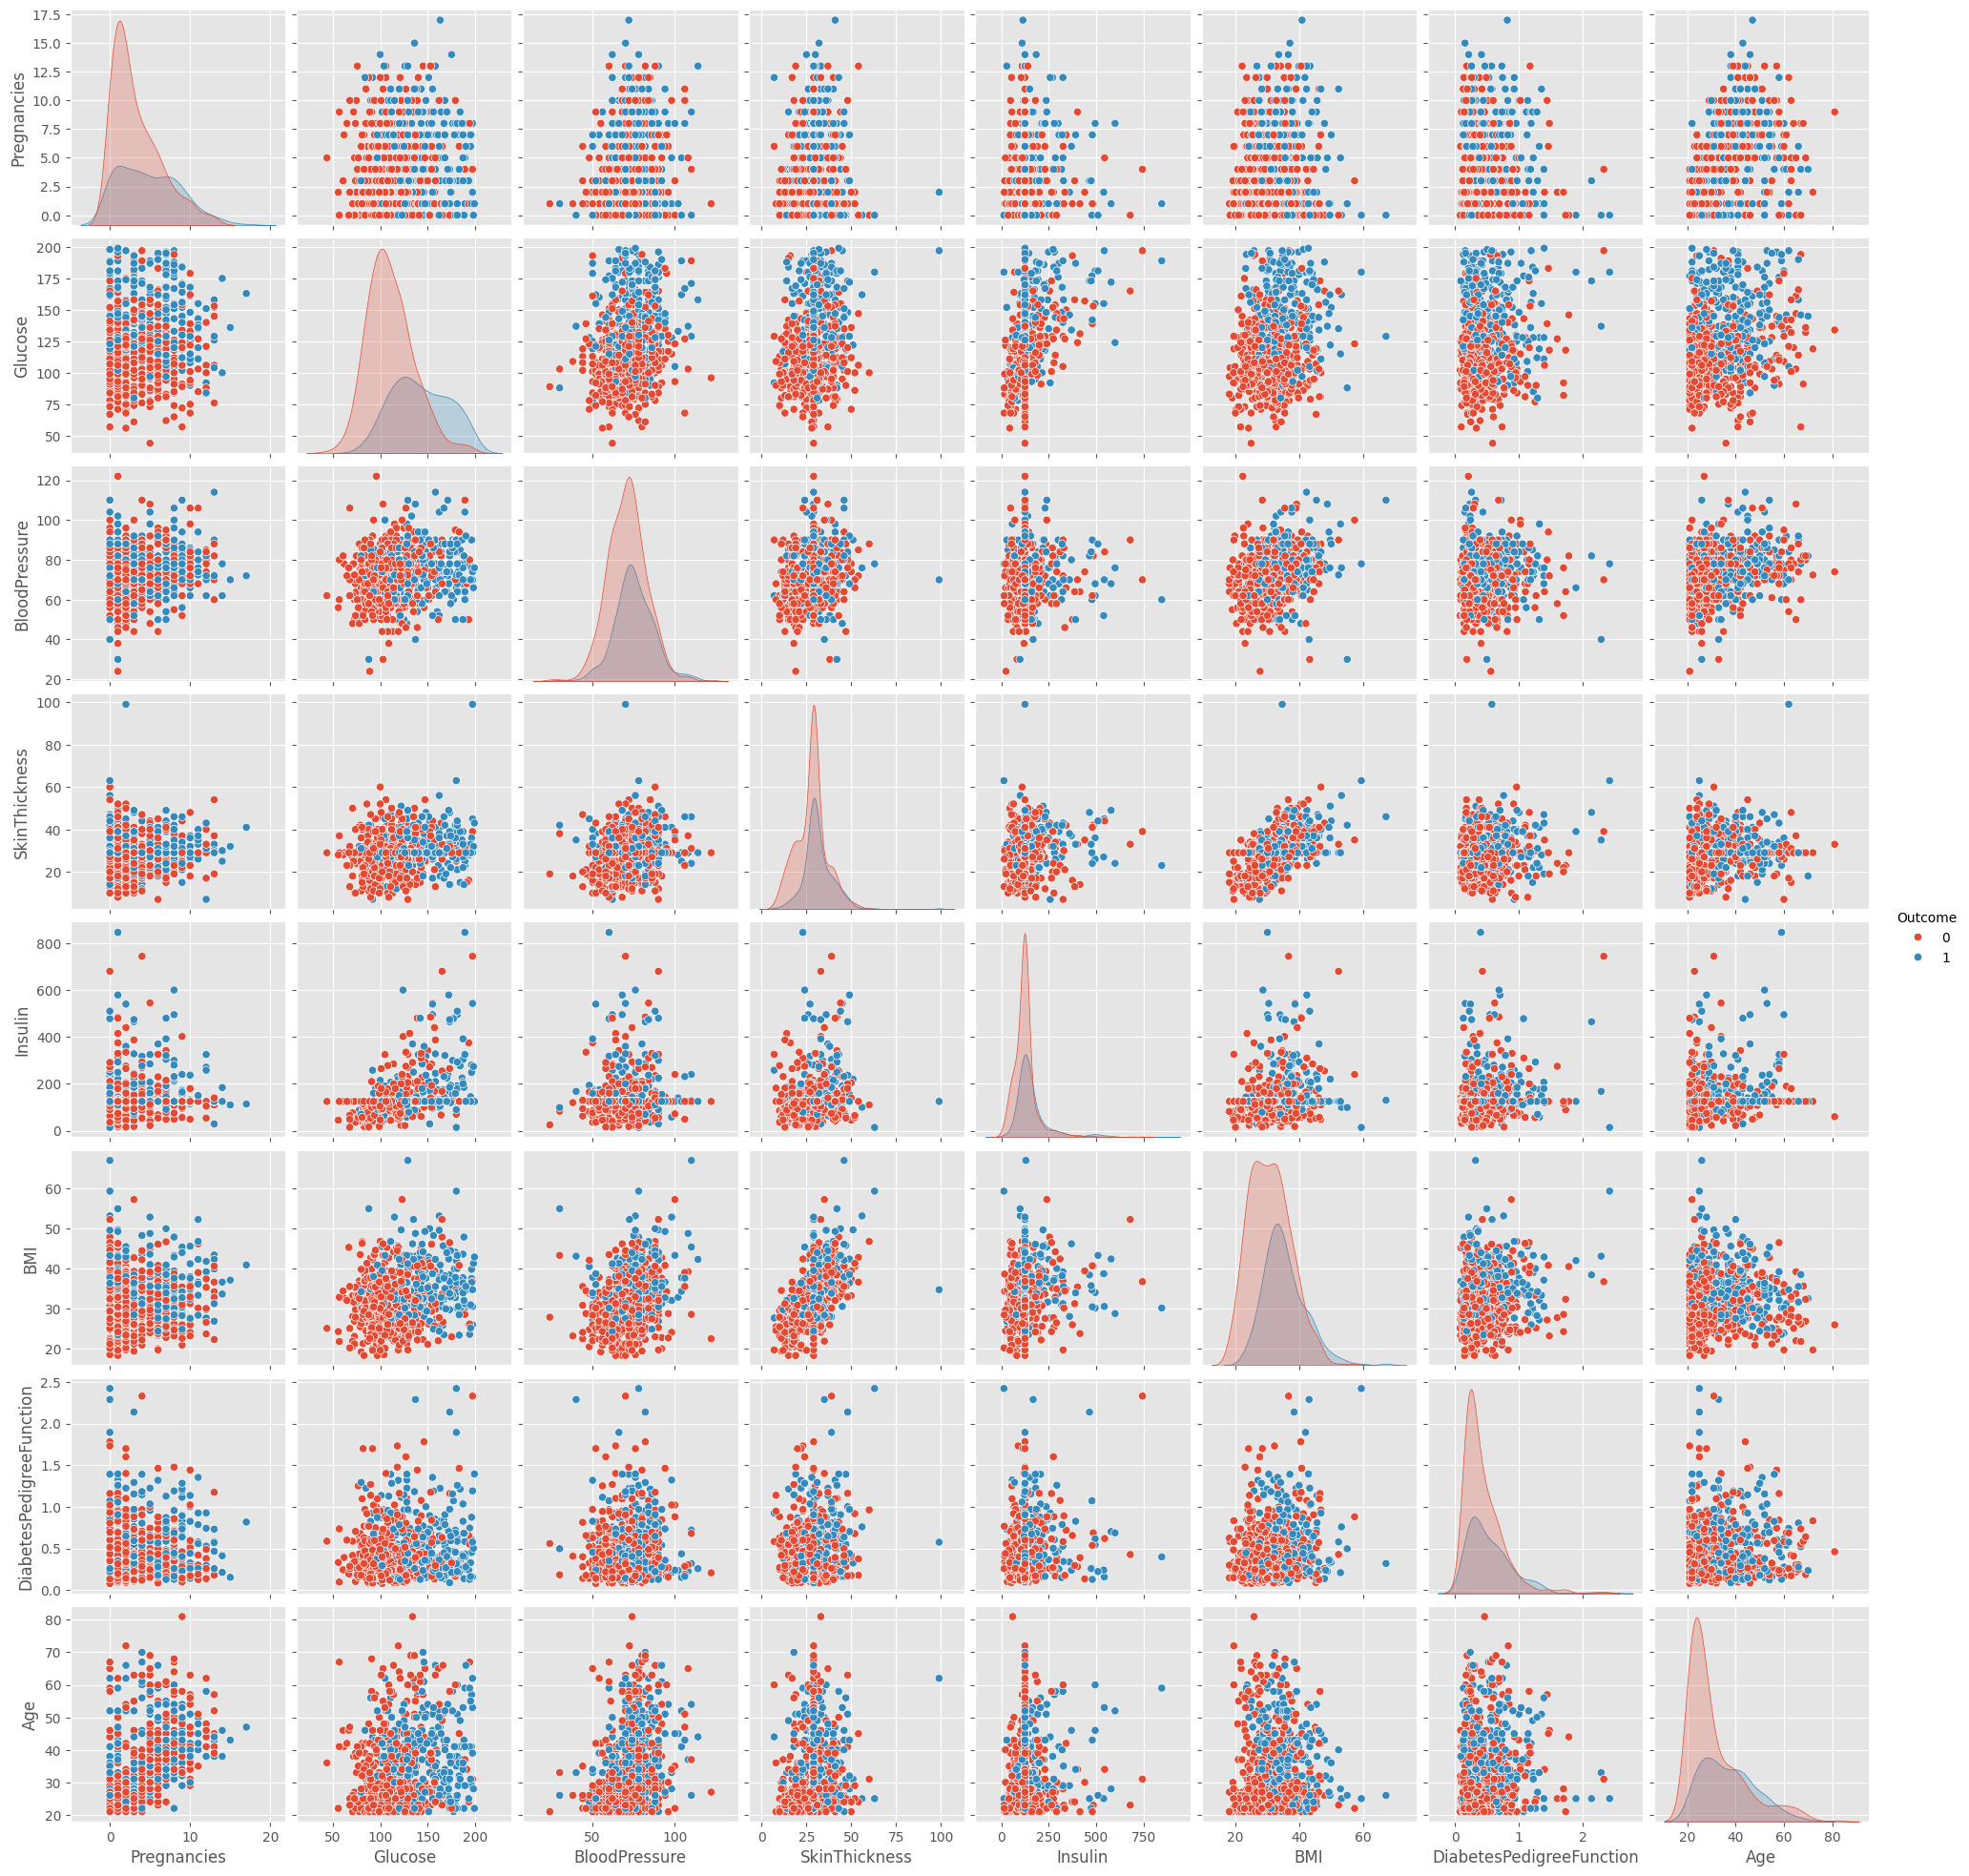

In [ ]:
# After Cleaning the data relation between the features
p=sns.pairplot(df_copy, hue = 'Outcome')

<Axes: xlabel='Glucose', ylabel='Insulin'>

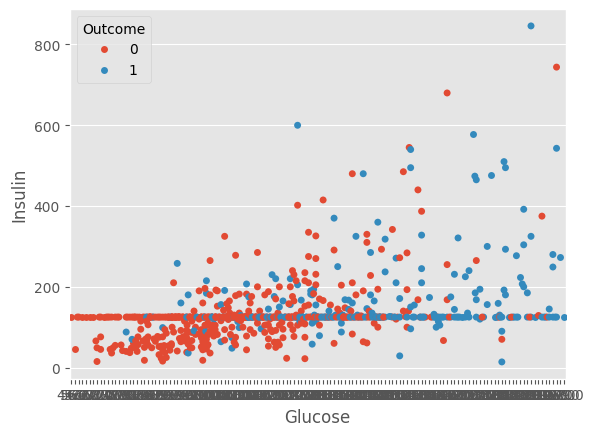

In [ ]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=df_copy, hue='Outcome')

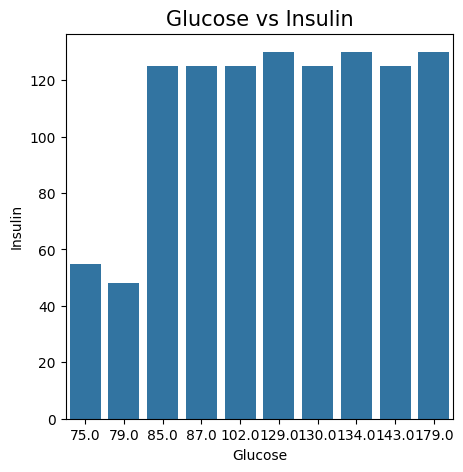

In [ ]:
# it more abvouis from the previous line plot to show the relationship between the glucose and insulin
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=df_copy[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

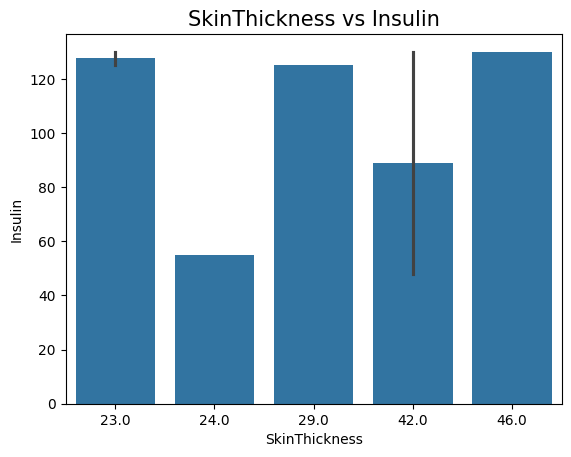

In [ ]:
# it shows the relationship between the skin thickness and insulin
sns.barplot(x="SkinThickness", y="Insulin", data=df_copy[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

**Correlation_Matrices**

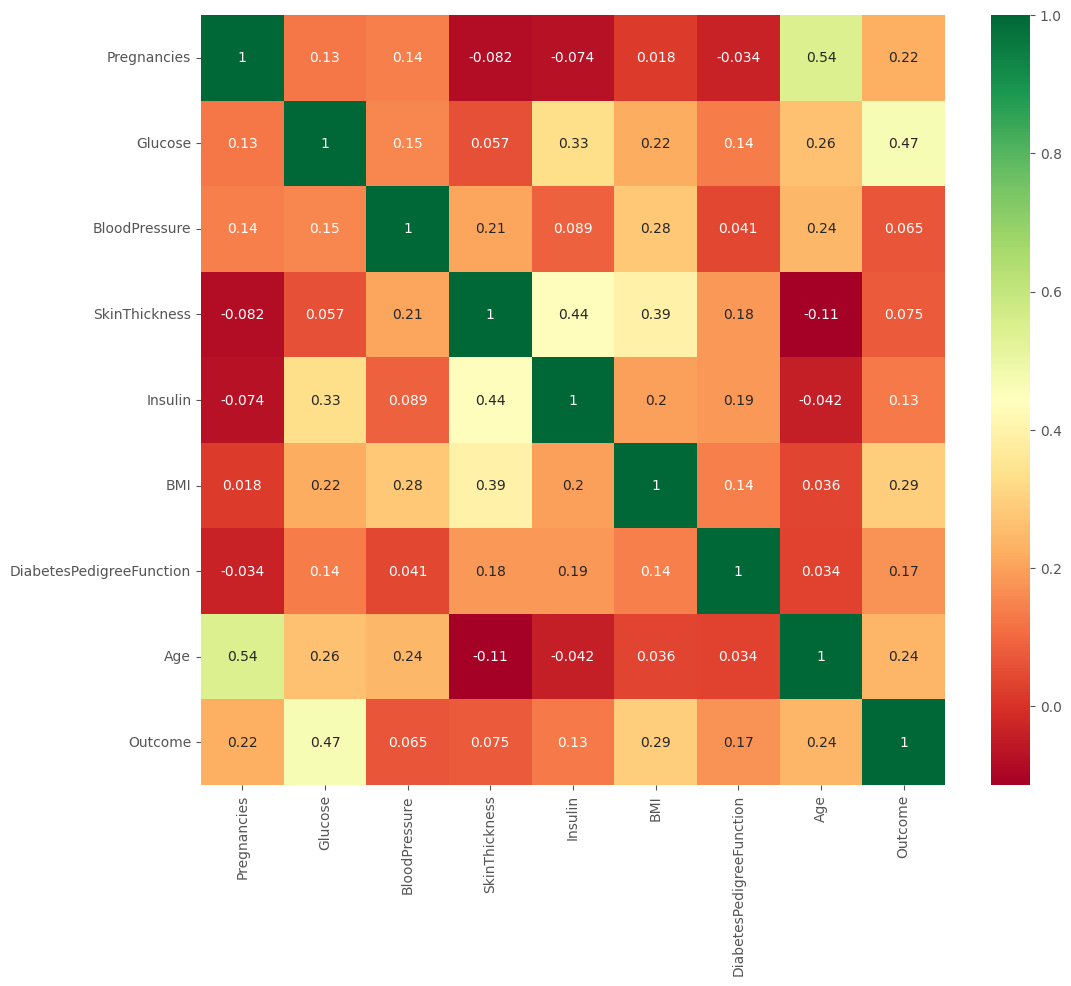

In [ ]:
# correlation matrix for unclean data
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

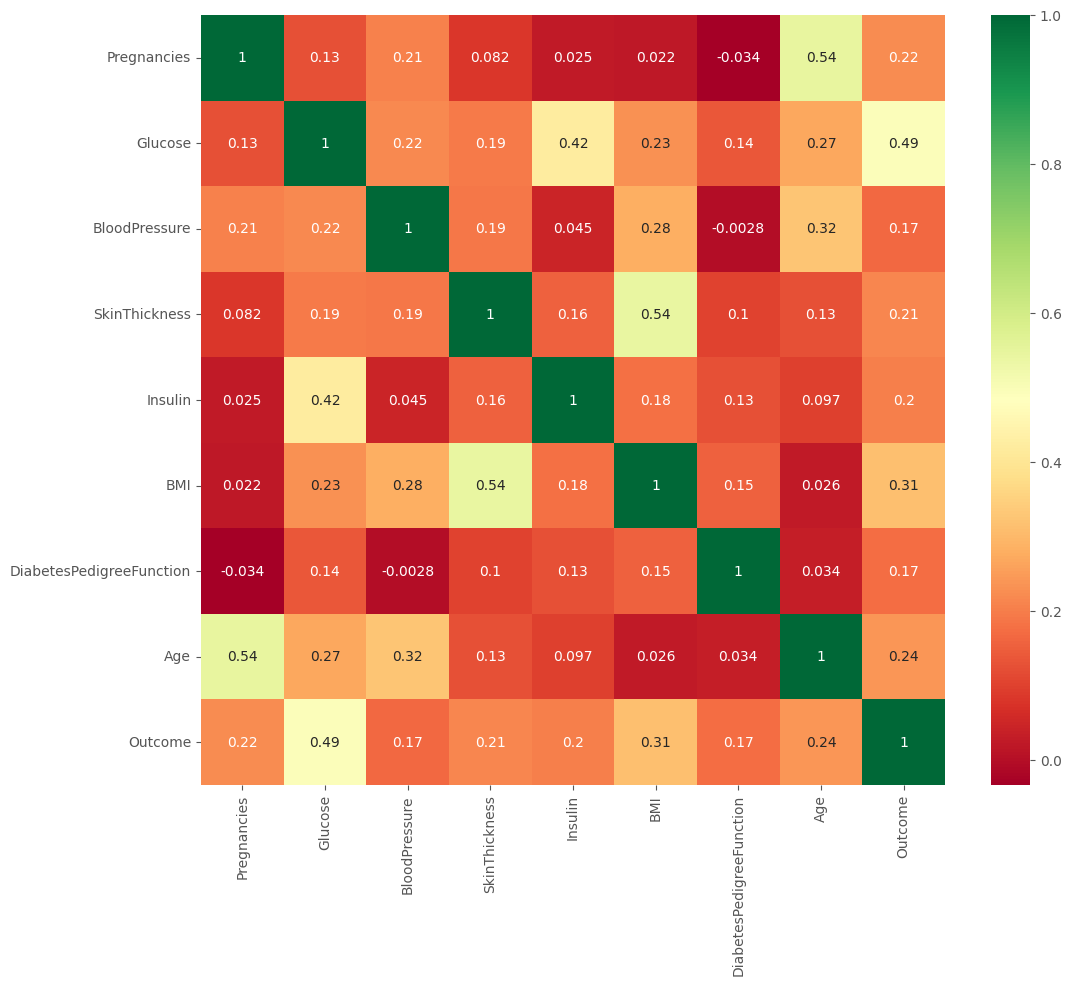

In [ ]:
# correlation matrix for clean data
plt.figure(figsize=(12,10))
p=sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')

Feature_Engineering_and_Features_Extraction

In [ ]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [ ]:
df_copy['NewBMI'] = NewBMI
df_copy.loc[df_copy["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df_copy.loc[(df_copy["BMI"]>18.5) & df_copy["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df_copy.loc[(df_copy["BMI"]>24.9) & df_copy["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df_copy.loc[(df_copy["BMI"]>29.9) & df_copy["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df_copy.loc[(df_copy["BMI"]>34.9) & df_copy["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df_copy.loc[df_copy["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [ ]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI  
0                     0.627   50        1  Obesity 2  
1                     0.351   31        0  Obesity 2  
2                     0.672   32        1  Obesity 2  
3                     0.167   21        0  Obesity 2  
4                     2.288   33        1  Obesity 3

In [ ]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
df_copy = df_copy.assign(NewInsulinScore=df_copy.apply(set_insuline, axis=1))

In [ ]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI NewInsulinScore  
0                     0.627   50        1  Obesity 2          Normal  
1                     0.351   31        0  Obesity 2          Normal  
2                     0.672   32        1  Obesity 2          Normal  
3                     0.167   21        0  Obesity 2          Normal  
4                     2.288   33        1  Obesity 3        Abnormal

In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df_copy["NewGlucose"] = NewGlucose
df_copy.loc[df_copy["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df_copy.loc[(df_copy["Glucose"] > 70) & (df_copy["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df_copy.loc[(df_copy["Glucose"] > 99) & (df_copy["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df_copy.loc[df_copy["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI NewInsulinScore  \
0                     0.627   50        1  Obesity 2          Normal   
1                     0.351   31        0  Obesity 2          Normal   
2                     0.672   32        1  Obesity 2          Normal   
3                     0.167   21        0  Obesity 2          Normal   
4                     2.288   33        1  Obesity 3        Abnormal   

  NewGlucose  
0     Secret  
1     Normal  
2     Secret  
3     Normal  
4     Secret

Categorical_Features_Encoding

In [ ]:
# One hot encoding
df_copy = pd.get_dummies(df_copy, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)
df_copy = df_copy.astype(int)

In [ ]:
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [ ]:
categorical_df_copy = df_copy[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
categorical_df_copy.head()

NewBMI_Obesity 1  NewBMI_Obesity 2  NewBMI_Obesity 3  NewBMI_Overweight  \
0                 0                 1                 0                  0   
1                 0                 1                 0                  0   
2                 0                 1                 0                  0   
3                 0                 1                 0                  0   
4                 0                 0                 1                  0   

   NewBMI_Underweight  NewInsulinScore_Normal  NewGlucose_Low  \
0                   0                       1               0   
1                   0                       1               0   
2                   0                       1               0   
3                   0                       1               0   
4                   0                       0               0   

   NewGlucose_Normal  NewGlucose_Overweight  NewGlucose_Secret  
0                  0                      0                  1  
1                  1                      0                  0  
2                  0                      0                  1  
3                  1                      0                  0  
4                  0                      0                  1

In [ ]:
Y=df_copy['DiabetesPedigreeFunction']
x=df_copy.drop(['DiabetesPedigreeFunction','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)
cols = x.columns
index = x.index
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x)
X=transformer.transform(x)
X=pd.DataFrame(x, columns = cols, index = index)

In [ ]:
x = pd.concat([x, categorical_df_copy], axis=1)

In [ ]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  Age  \
0            6      148             72             35      125   33   50   
1            1       85             66             29      125   26   31   
2            8      183             64             29      125   23   32   
3            1       89             66             23       94   28   21   
4            0      137             40             35      168   43   33   

   Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  NewBMI_Obesity 3  \
0        1                 0                 1                 0   
1        0                 0                 1                 0   
2        1                 0                 1                 0   
3        0                 0                 1                 0   
4        1                 0                 0                 1   

   NewBMI_Overweight  NewBMI_Underweight  NewInsulinScore_Normal  \
0                  0                   0                       1   
1                  0                   0                       1   
2                  0                   0                       1   
3                  0                   0                       1   
4                  0                   0                       0   

   NewGlucose_Low  NewGlucose_Normal  NewGlucose_Overweight  NewGlucose_Secret  
0               0                  0                      0                  1  
1               0                  1                      0                  0  
2               0                  0                      0                  1  
3               0                  1                      0                  0  
4               0                  0                      0                  1

In [ ]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            6      148             72             35      125   33   
1            1       85             66             29      125   26   
2            8      183             64             29      125   23   
3            1       89             66             23       94   28   
4            0      137             40             35      168   43   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                         0   50        1                 0                 1   
1                         0   31        0                 0                 1   
2                         0   32        1                 0                 1   
3                         0   21        0                 0                 1   
4                         2   33        1                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 1                  0                   0   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                       1               0                  0   
1                       1               0                  1   
2                       1               0                  0   
3                       1               0                  1   
4                       0               0                  0   

   NewGlucose_Overweight  NewGlucose_Secret  
0                      0                  1  
1                      0                  0  
2                      0                  1  
3                      0                  0  
4                      0                  1

Splitting_Dataset_into_Train_and_Test

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42)

***Regression***

**Linear_Regression_Model**

In [ ]:
lr = LinearRegression()
model_lr = lr.fit(x_train, Y_train)
y_pred_train_lr = lr.predict(x_train)
y_pred_test_lr = lr.predict(x_test)
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_pred_train_lr)))
print('Testing accuracy : {}\n'.format(r2_score(Y_test, y_pred_test_lr)))

Training accuracy : 0.0608316082837721

Testing accuracy : -0.02905245773754883



In [ ]:
mse_linear = mean_squared_error(Y_test, y_pred_test_lr)
r2 = r2_score(Y_test, y_pred_test_lr)
print(f'Mean Squared Error for Linear Regression: {mse_linear}')
print("---------------------------------------------------------------")
print(f'R^2 Score for Linear Regression: {-r2}')
print("---------------------------------------------------------------")
print(f'Linear Regression Coefficients: {lr.coef_}')

Mean Squared Error for Linear Regression: 0.062482523998232
---------------------------------------------------------------
R^2 Score for Linear Regression: 0.02905245773754883
---------------------------------------------------------------
Linear Regression Coefficients: [-1.34438931e-03  1.27633283e-03 -8.16731800e-06  2.39983643e-03
 -1.51460232e-05 -2.32299285e-03  2.36193104e-04  1.88709683e-02
 -1.38777878e-17 -6.93768034e-02  6.93768034e-02  1.19262239e-18
  6.93889390e-18 -5.53000463e-02  1.00942444e-02  2.59655967e-02
 -2.09762339e-02 -1.50836072e-02]


Ridge Regression Model

In [ ]:
ridge1 = Ridge(alpha = 20)
model_ridge1 = ridge1.fit(x_train, Y_train)
y_pred_train_ridge1 = ridge1.predict(x_train)
y_pred_test_ridge1 = ridge1.predict(x_test)
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_pred_train_ridge1).round(5)))
print('Testing accuracy : {}'.format(-r2_score(Y_test, y_pred_test_ridge1).round(5)))

Training accuracy : 0.05977

Testing accuracy : 0.02595


In [ ]:
mse1 = cross_val_score(ridge1, x, Y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse1 = np.mean(mse1)
r2 = r2_score(Y_test, y_pred_test_ridge1)
print(f'Mean Squared Error for Ridge Regression: {-mean_mse1}')
print("---------------------------------------------------------------")
print(f'R^2 Score for Ridge Regression: {-r2}')
print("---------------------------------------------------------------")
print(f'Ridge Regression Coefficients: {ridge1.coef_}')

Mean Squared Error for Ridge Regression: 0.0760871429720231
---------------------------------------------------------------
R^2 Score for Ridge Regression: 0.02594753181907583
---------------------------------------------------------------
Ridge Regression Coefficients: [-1.64412511e-03  1.17879731e-03 -4.83317142e-05  2.33004631e-03
  3.12410507e-05 -1.11710371e-03  2.23656501e-04  1.44437402e-02
  0.00000000e+00 -5.39304281e-02  5.39304281e-02  0.00000000e+00
  0.00000000e+00 -3.68701209e-02  2.06413236e-03  2.13625494e-02
 -1.77954429e-02 -5.63123892e-03]


Ridge Regression Model With Grid Search

In [ ]:
ridge2 = Ridge()

parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.9, 0.8, 0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

ridge_regressor = GridSearchCV(ridge2, parameters, scoring='neg_mean_squared_error', cv= 10)

ridge_regressor.fit(x_train, Y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.9, 0.8,
                                   0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50,
                                   55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(-(ridge_regressor.best_score_))

{'alpha': 100}
0.08079421409278373


In [ ]:
y_train_pred_ridg2 = ridge_regressor.predict(x_train)
y_test_pred_ridg2 = ridge_regressor.predict(x_test)
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_train_pred_ridg2).round(5)))
print('Testing accuracy : {}'.format(-r2_score(Y_test, y_test_pred_ridg2).round(5)))

Training accuracy : 0.05418

Testing accuracy : 0.02416


In [ ]:
mse2 = cross_val_score(ridge_regressor, x, Y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse2 = np.mean(mse2)
r2 = r2_score(Y_test, y_test_pred_ridg2)
print(f'Mean Squared Error for Ridge Regression: {-mean_mse2}')
print("---------------------------------------------------------------")
print(f'R^2 Score for Ridge Regression: {-r2}')
print("---------------------------------------------------------------")
print(f'Ridge Regression Coefficients: {ridge_regressor.best_estimator_.coef_}')

Mean Squared Error for Ridge Regression: 0.07618343379479584
---------------------------------------------------------------
R^2 Score for Ridge Regression: 0.024158931733351485
---------------------------------------------------------------
Ridge Regression Coefficients: [-2.04279583e-03  1.13155273e-03 -9.66134556e-05  2.20293681e-03
  8.02710025e-05  8.27027701e-04  1.98417094e-04  7.44182527e-03
  0.00000000e+00 -2.85685900e-02  2.85685900e-02  0.00000000e+00
  0.00000000e+00 -1.59095396e-02  3.68112392e-04  1.28026074e-02
 -1.36196207e-02  4.48900900e-04]


Lasso Regression Model

In [ ]:
lasso1 = Lasso()
model_lasso1 = lasso1.fit(x_train, Y_train)
y_pred_train_lasso1 = lasso1.predict(x_train)
y_pred_test_lasso1 = lasso1.predict(x_test)
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_pred_train_lasso1).round(5)))
print('Testing accuracy : {}'.format(r2_score(Y_test, y_pred_test_lasso1).round(5)))

Training accuracy : 0.01392

Testing accuracy : 0.01169


In [ ]:
mse3 = cross_val_score(lasso1, x, Y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse3 = np.mean(mse3)
r2 = r2_score(Y_test, y_pred_test_lasso1)
print(f'Mean Squared Error for Lasso Regression: {-mean_mse3}')
print("---------------------------------------------------------------")
print(f'R^2 Score for Lasso Regression: {r2}')
print("---------------------------------------------------------------")
print(f'Lasso Regression Coefficients: {lasso1.coef_}')

Mean Squared Error for Lasso Regression: 0.07714681585655643
---------------------------------------------------------------
R^2 Score for Lasso Regression: 0.011686782941162877
---------------------------------------------------------------
Lasso Regression Coefficients: [-0.          0.00016449  0.          0.          0.00019827  0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.         -0.         -0.          0.        ]


Lasso Regression With Grid Search

In [ ]:
lasso2 = Lasso()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.9, 0.8, 0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso2, parameters, scoring='neg_mean_squared_error', cv= 10)
lasso_regressor.fit(x_train, Y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.9, 0.8,
                                   0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50,
                                   55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(-(lasso_regressor.best_score_))

{'alpha': 0.5}
0.08041223356754604


In [ ]:
y_train_pred_lasso2 = lasso_regressor.predict(x_train)
y_test_pred_lasso2 = lasso_regressor.predict(x_test)
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_train_pred_lasso2).round(5)))
print('Testing accuracy : {}'.format(r2_score(Y_test, y_test_pred_lasso2).round(5)))

Training accuracy : 0.02423

Testing accuracy : 0.00209


In [ ]:
mse4 = cross_val_score(lasso_regressor, x, Y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse4 = np.mean(mse4)
r2 = r2_score(Y_test, y_test_pred_lasso2)
print(f'Mean Squared Error for Lasso Regression: {-mean_mse4}')
print("---------------------------------------------------------------")
print(f'R^2 Score for Lasso Regression: {r2}')
print("---------------------------------------------------------------")
print(f'Lasso Regression Coefficients: {lasso_regressor.best_estimator_.coef_}')

Mean Squared Error for Lasso Regression: 0.0772649085401977
---------------------------------------------------------------
R^2 Score for Lasso Regression: 0.0020938261581880946
---------------------------------------------------------------
Lasso Regression Coefficients: [-0.          0.0007375   0.          0.          0.00018155  0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.         -0.          0.        ]


Elastic Net Regression Model

In [ ]:
enet1 = ElasticNet()
model_enet1 = enet1.fit(x_train, Y_train)
y_pred_train_enet1 = enet1.predict(x_train)
y_pred_test_enet1 = enet1.predict(x_test)
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_pred_train_enet1).round(5)))
print('Testing accuracy : {}'.format(r2_score(Y_test, y_pred_test_enet1).round(5)))

Training accuracy : 0.02423

Testing accuracy : 0.00211


In [ ]:
mse5 = cross_val_score(enet1, x, Y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse5 = np.mean(mse5)
print(-(mean_mse5))
r2 = r2_score(Y_test, y_pred_test_enet1)
print(f'Mean Squared Error for Elastic Net Regression: {-mean_mse5}')
print("---------------------------------------------------------------")
print(f'R^2 Score for Elastic Net Regression: {r2}')
print("---------------------------------------------------------------")
print(f'Elastic Net Regression Coefficients: {enet1.coef_}')

0.07664944577939944
Mean Squared Error for Elastic Net Regression: 0.07664944577939944
---------------------------------------------------------------
R^2 Score for Elastic Net Regression: 0.0021070287093494233
---------------------------------------------------------------
Elastic Net Regression Coefficients: [-0.          0.00073702  0.          0.          0.00018161  0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.         -0.          0.        ]


Elastic Net Regression Model With Grid Search

In [ ]:
enet2 = ElasticNet()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.9, 0.8, 0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
enet_regressor = GridSearchCV(enet2, parameters, scoring='neg_mean_squared_error', cv= 10)
enet_regressor.fit(x_train, Y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.9, 0.8,
                                   0.7, 0.5, 1, 5, 10, 20, 30, 35, 40, 45, 50,
                                   55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(enet_regressor.best_params_)
print(-(enet_regressor.best_score_))

{'alpha': 0.7}
0.0802644695032542


In [ ]:
y_train_pred_enet2 = enet_regressor.predict(x_train)
y_test_pred_enet2 = enet_regressor.predict(x_test)
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_train_pred_enet2)))
print('Testing accuracy : {}'.format(-r2_score(Y_test, y_test_pred_enet2)))

Training accuracy : 0.025980254811698855

Testing accuracy : 0.00276911678982672


In [ ]:
mse6 = cross_val_score(enet_regressor, x, Y, scoring = 'neg_mean_squared_error',cv=5)
mean_mse6 = np.mean(mse6)
print(-(mean_mse6))
r2 = r2_score(Y_test, y_test_pred_enet2)
print(f'Mean Squared Error for Elastic Net Regression: {-mean_mse6}')
print("---------------------------------------------------------------")
print(f'R^2 Score for Elastic Net Regression: {-r2}')
print("---------------------------------------------------------------")
print(f'Elastic Net Regression Coefficients: {enet_regressor.best_estimator_.coef_}')

0.0771377705509419
Mean Squared Error for Elastic Net Regression: 0.0771377705509419
---------------------------------------------------------------
R^2 Score for Elastic Net Regression: 0.00276911678982672
---------------------------------------------------------------
Elastic Net Regression Coefficients: [-0.          0.00090899  0.          0.          0.00017659  0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.         -0.          0.        ]


***Classification***

KNN Model

In [ ]:
y=df_copy['Outcome']
X=df_copy.drop('Outcome', axis=1)

In [ ]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            6      148             72             35      125   33   
1            1       85             66             29      125   26   
2            8      183             64             29      125   23   
3            1       89             66             23       94   28   
4            0      137             40             35      168   43   

   DiabetesPedigreeFunction  Age  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                         0   50                 0                 1   
1                         0   31                 0                 1   
2                         0   32                 0                 1   
3                         0   21                 0                 1   
4                         2   33                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 1                  0                   0   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                       1               0                  0   
1                       1               0                  1   
2                       1               0                  0   
3                       1               0                  1   
4                       0               0                  0   

   NewGlucose_Overweight  NewGlucose_Secret  
0                      0                  1  
1                      0                  0  
2                      0                  1  
3                      0                  0  
4                      0                  1

In [ ]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            6      148             72             35      125   33   
1            1       85             66             29      125   26   
2            8      183             64             29      125   23   
3            1       89             66             23       94   28   
4            0      137             40             35      168   43   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                         0   50        1                 0                 1   
1                         0   31        0                 0                 1   
2                         0   32        1                 0                 1   
3                         0   21        0                 0                 1   
4                         2   33        1                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 1                  0                   0   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                       1               0                  0   
1                       1               0                  1   
2                       1               0                  0   
3                       1               0                  1   
4                       0               0                  0   

   NewGlucose_Overweight  NewGlucose_Secret  
0                      0                  1  
1                      0                  0  
2                      0                  1  
3                      0                  0  
4                      0                  1

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=250)
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

0.7833876221498371
0.8181818181818182


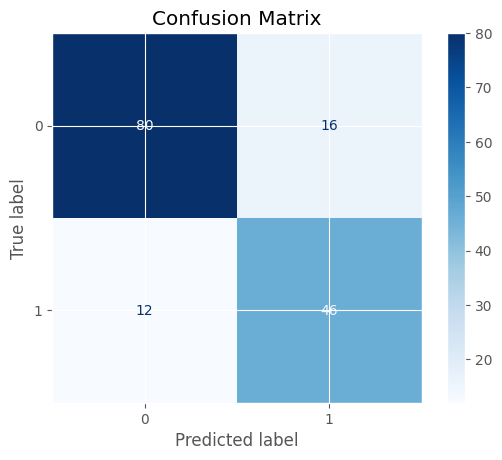

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        96
           1       0.74      0.79      0.77        58

    accuracy                           0.82       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.82      0.82      0.82       154



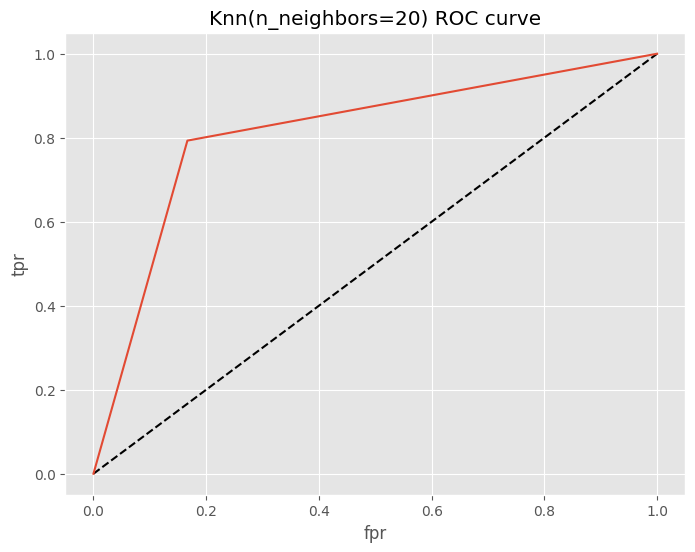

In [ ]:
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=20) ROC curve')
plt.show()

Deep Learning

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=250)
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras import layers
from keras import ops

In [ ]:
modelAll=Sequential(name='DiabetecWithAllPreidctors')
modelAll.add(Dense(18,input_shape=(18,),activation='relu',name='Input_Layer'))
modelAll.add(Dense(16,activation='relu',name='Hidden_Layer1'))
modelAll.add(Dense(16,activation='relu',name='Hidden_Layer2'))
modelAll.add(Dense(16,activation='relu',name='Hidden_Layer3'))
modelAll.add(Dense(1,activation='sigmoid',name='Output_Layer'))
modelAll.summary()

Model: "DiabetecWithAllPreidctors"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer1 (Dense)                │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207 (4.71 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1=model.fit(X_train, y_train, epochs=150, batch_size=10,  validation_data=(X_test, y_test))

Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9462 - loss: 0.1328 - val_accuracy: 0.7208 - val_loss: 0.9874
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9546 - loss: 0.1327 - val_accuracy: 0.7208 - val_loss: 0.9901
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9578 - loss: 0.1120 - val_accuracy: 0.7208 - val_loss: 1.0079
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9542 - loss: 0.1406 - val_accuracy: 0.7013 - val_loss: 1.0080
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9636 - loss: 0.1127 - val_accuracy: 0.7208 - val_loss: 1.0141
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.1206 - val_accuracy: 0.7143 - val_loss: 1.0099
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.1139 - val_accuracy: 0.7143 - val_loss: 1.0103
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9607 - loss: 0.1235 - val_accuracy: 0.7078 - 

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Accuracy Train: {}'.format(accuracy))
# Evaluate the model - Test
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy Test: {}'.format(accuracy))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9768 - loss: 0.0800 
Accuracy Train: 0.9804560542106628
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7168 - loss: 1.3295 
Accuracy Test: 0.7077922224998474


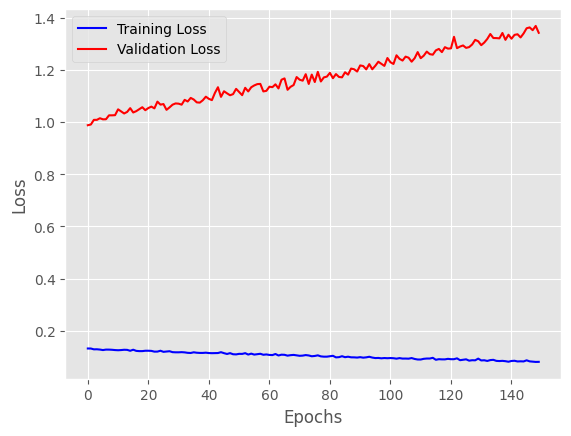

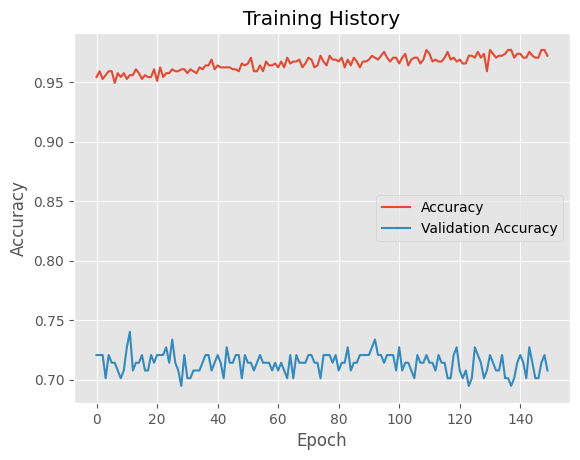

In [ ]:
# Plot the training and validation loss for each epoch
plt.plot(history1.history['loss'], color='b', label='Training Loss')
plt.plot(history1.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

In [ ]:
# that is an abvouis overfitting I must find a solution

In [ ]:
modelAll1=Sequential(name='DiabetecWithAllPreidctors')
modelAll1.add(Dense(18,input_shape=(18,),activation='relu',name='Input_Layer'))
modelAll1.add(Dense(16,activation='relu',name='Hidden_Layer1'))
modelAll1.add(Dense(16,activation='relu',name='Hidden_Layer2'))
modelAll1.add(Dense(1,activation='sigmoid',name='Output_Layer'))
modelAll1.summary()

Model: "DiabetecWithAllPreidctors"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer1 (Dense)                │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 935 (3.65 KB)

 Trainable params: 935 (3.65 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelAll1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
historyAll1=modelAll1.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test,y_test))

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6385 - loss: 0.6333 - val_accuracy: 0.7338 - val_loss: 0.5776
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.5466 - val_accuracy: 0.7468 - val_loss: 0.5360
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7585 - loss: 0.4836 - val_accuracy: 0.7727 - val_loss: 0.5191
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7808 - loss: 0.4541 - val_accuracy: 0.7662 - val_loss: 0.5159
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7788 - loss: 0.4615 - val_accuracy: 0.7662 - val_loss: 0.5084
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7605 - loss: 0.4718 - val_accuracy: 0.7597 - val_loss: 0.5079
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.4780 - val_accuracy: 0.7792 - val_loss: 0.5038
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.4305 - val_accuracy: 0.7662 - val_loss:

In [ ]:
# Evaluate the model - train
loss, accuracy = modelAll1.evaluate(X_train, y_train)
print('Accuracy Train: {}'.format(accuracy))
# Evaluate the model - train
loss, accuracy = modelAll1.evaluate(X_test, y_test)
print('Accuracy Test: {}'.format(accuracy))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8191 - loss: 0.3774 
Accuracy Train: 0.8338761925697327
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7580 - loss: 0.5637 
Accuracy Test: 0.7857142686843872


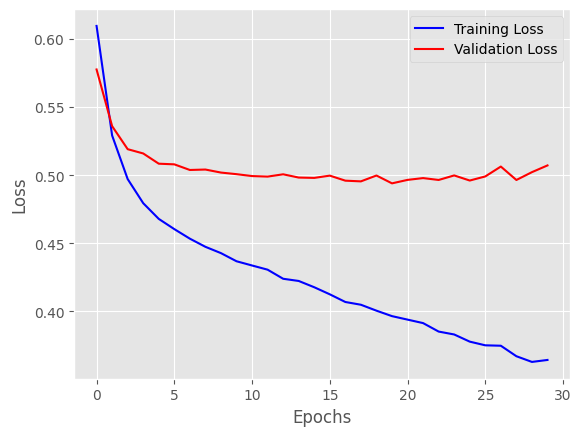

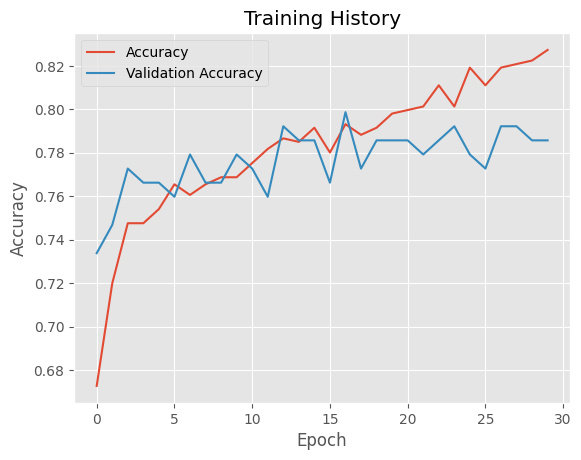

In [ ]:
plt.plot(historyAll1.history['loss'], color='b', label='Training Loss')
plt.plot(historyAll1.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.plot(historyAll1.history['accuracy'], label='Accuracy')
plt.plot(historyAll1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

In [ ]:
# I will use regularization to solve overfitting

In [ ]:
from keras.regularizers import l1_l2

model3 = Sequential(name='DiabeticModel_Overfitting_L1L2')

# Add layers to the model with both L1 and L2 regularization
model3.add(Dense(18, input_shape=(18,), activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), name='Input_Layer'))
model3.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), name='Hidden_Layer_1'))
model3.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), name='Hidden_Layer_2'))
model3.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01), name='Hidden_Layer_3'))
model3.add(Dense(1, activation='sigmoid', name='Output_Layer'))

model3.summary()

model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=250, batch_size=10, validation_data=(X_test, y_test))

Model: "DiabeticModel_Overfitting_L1L2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_1 (Dense)               │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,207 (4.71 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6478 - loss: 3.5693 - val_accuracy: 0.6234 - val_loss: 2.9717
Epoch 2/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - loss: 2.7953 - val_accuracy: 0.6234 - val_loss: 2.3139
Epoch 3/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6887 - loss: 2.1458 - val_accuracy: 0.6234 - val_loss: 1.7892
Epoch 4/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6493 - loss: 1.6664 - val_accuracy: 0.6234 - val_loss: 1.3994
Epoch 5/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6666 - loss: 1.2917 - val_accuracy: 0.6234 - val_loss: 1.1142
Epoch 6/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6471 - loss: 1.0430 - val_accuracy: 0.6234 - val_loss: 0.9171
Epoch 7/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.8379 - val_accuracy: 0.6234 - val_loss: 0.7912
Epoch 8/250
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6447 - loss: 0.7553 - val_accuracy: 0.6234 - v

In [ ]:
loss, accuracy = model3.evaluate(X_train, y_train)
print('Accuracy Train: {}'.format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test)
print('Accuracy Test: {}'.format(accuracy))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7462 - loss: 0.5560 
Accuracy Train: 0.7833876013755798
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7697 - loss: 0.5550 
Accuracy Test: 0.7727272510528564


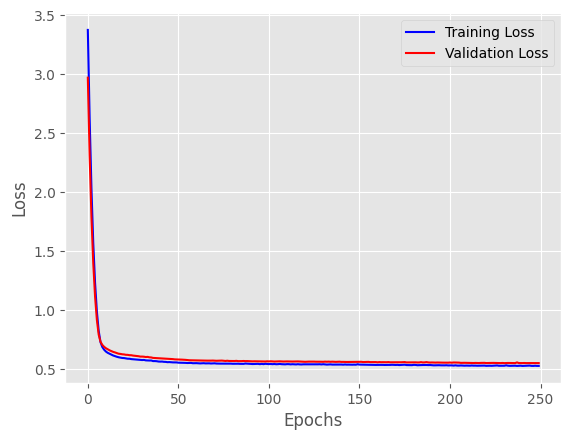

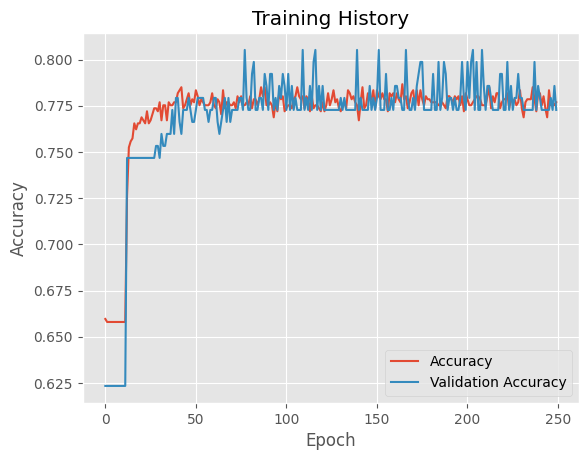

In [ ]:
plt.plot(history3.history['loss'], color='b', label='Training Loss')
plt.plot(history3.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


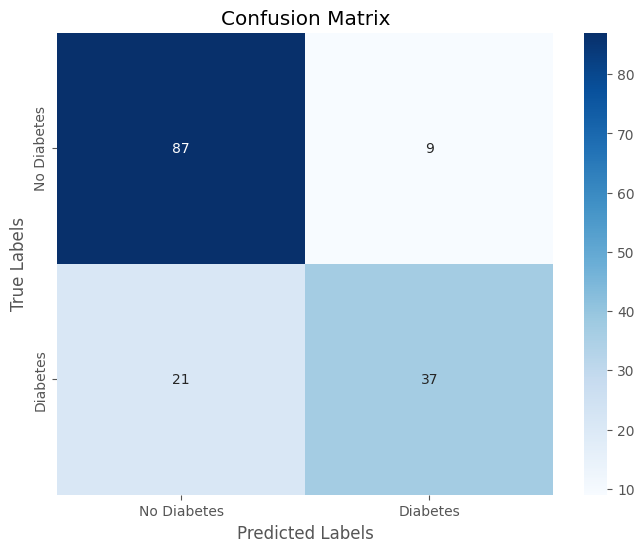

Accuracy: 0.8051948051948052
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85        96
           1       0.80      0.64      0.71        58

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.81      0.81      0.80       154

Matthews Correlation Coefficient (MCC): 0.5761057655992994


In [ ]:
y_pred = model3.predict(X_test)
y_pred = (y_pred > 0.56).astype(int)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'], output_dict=True)
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Matthews Correlation Coefficient (MCC):', matthews_corrcoef(y_test, y_pred))

***Unsupervised Learning***

Clustering with Kmeans Algorithm

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_copy.drop('Outcome', axis=1))

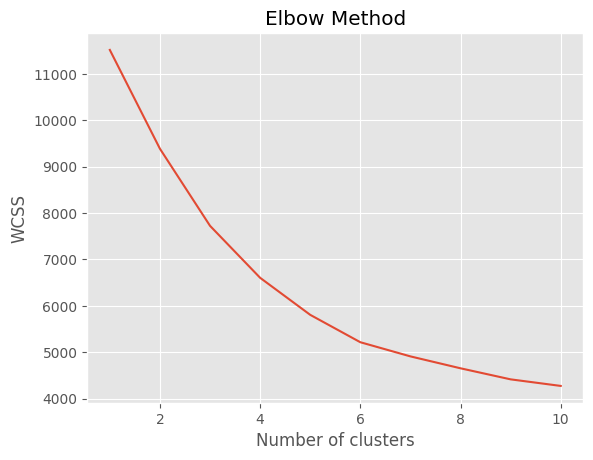

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

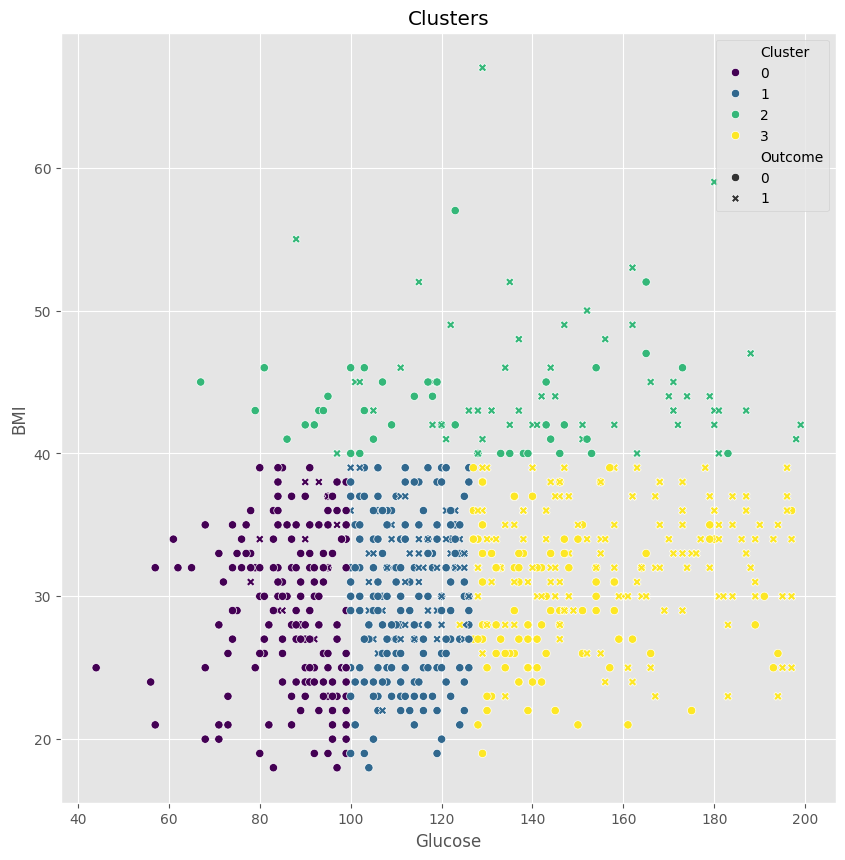

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)
df_copy['Cluster'] = clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_copy, x='Glucose', y='BMI', hue='Cluster', style='Outcome', palette='viridis')
plt.title('Clusters')
plt.show()